1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [1379]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

# 1. Познакомьтесь с данными

In [1180]:
df = pd.read_csv('air_data.csv', sep=';')

In [1181]:
df.head()

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


In [1182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISSUE_DATE         50000 non-null  object
 1   FLIGHT_DATE_LOC    50000 non-null  object
 2   PAX_TYPE           50000 non-null  object
 3   REVENUE_AMOUNT     50000 non-null  int64 
 4   ORIG_CITY_CODE     49998 non-null  object
 5   DEST_CITY_CODE     49999 non-null  object
 6   ROUTE_FLIGHT_TYPE  50000 non-null  object
 7   FFP_FLAG           19398 non-null  object
 8   SALE_TYPE          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [1183]:
print('Количество строк в датафрейме:', df.shape[0])
print('Количество столбцов в датафрейме:', df.shape[1])

Количество строк в датафрейме: 50000
Количество столбцов в датафрейме: 9


Таким образом, видим, что все столбцы, кроме суммы с продажи билетов, имеют тип данных object. Также заметны пропуски в столбцах orig_city_code и dest_city_code, причем почему-то их количество не равно друг другу, что говорит о возможной случайной ошибке. Пропуски в столбце ffp_flag могут быть обусловлены типом отображения информации и не быть связаны с качеством данных. Всё это требует предобработки датафрейма. 

# 2. Осуществите предобработку данных

### 2.1

Приведем заголовки к удобному виду

In [1184]:
df.columns

Index(['ISSUE_DATE', 'FLIGHT_DATE_LOC', 'PAX_TYPE', 'REVENUE_AMOUNT',
       'ORIG_CITY_CODE', 'DEST_CITY_CODE', 'ROUTE_FLIGHT_TYPE', 'FFP_FLAG',
       'SALE_TYPE'],
      dtype='object')

df.columns = ['issue_date', 'flight_date_loc', 'pax_type', 'revenue_amount', 'orig_city_code', 'dest_city_code', 'route_flight_type', 'ffp_flag', 'sale_type']

In [1185]:
df.columns = df.columns.str.lower()

In [1186]:
df.columns

Index(['issue_date', 'flight_date_loc', 'pax_type', 'revenue_amount',
       'orig_city_code', 'dest_city_code', 'route_flight_type', 'ffp_flag',
       'sale_type'],
      dtype='object')

Названия столбцов преобразованы по всем правилам

### 2.2

In [1187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   issue_date         50000 non-null  object
 1   flight_date_loc    50000 non-null  object
 2   pax_type           50000 non-null  object
 3   revenue_amount     50000 non-null  int64 
 4   orig_city_code     49998 non-null  object
 5   dest_city_code     49999 non-null  object
 6   route_flight_type  50000 non-null  object
 7   ffp_flag           19398 non-null  object
 8   sale_type          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


Для начала нужно переделать тип столбца с датами

In [1188]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
df['issue_date']

0       2021-12-07
1       2021-12-31
2       2021-11-28
3       2021-12-08
4       2021-12-08
           ...    
49995   2022-06-11
49996   2022-06-06
49997   2022-06-26
49998   2022-06-26
49999   2022-06-09
Name: issue_date, Length: 50000, dtype: datetime64[ns]

Чтобы проверить, правильно ли прочиталась дата, посмотрим на уникальные значения по каждому параметру: год, месяц, день

In [1189]:
pd.to_datetime(df['issue_date']).dt.year.unique()

array([2021, 2022], dtype=int64)

In [1190]:
pd.to_datetime(df['issue_date']).dt.month.unique()

array([12, 11,  1, 10,  6,  7,  8,  4,  5,  2,  3,  9], dtype=int64)

In [1191]:
pd.to_datetime(df['issue_date']).dt.day.unique()

array([ 7, 31, 28,  8, 29,  3,  2, 25,  6,  5, 15, 22, 13,  9, 26,  1, 10,
        4, 30, 21, 23, 27, 14, 12, 24, 11, 17, 16, 19, 20, 18],
      dtype=int64)

Всё верно, аналогичные действия проделаем для других столбцов с датами

In [1192]:
df['flight_date_loc'] = pd.to_datetime(df['flight_date_loc'])
df['flight_date_loc']

0       2022-01-11
1       2022-01-03
2       2022-01-04
3       2022-01-05
4       2022-01-12
           ...    
49995   2022-06-22
49996   2022-06-20
49997   2022-06-29
49998   2022-06-28
49999   2022-06-25
Name: flight_date_loc, Length: 50000, dtype: datetime64[ns]

In [1193]:
pd.to_datetime(df['flight_date_loc']).dt.year.unique()

array([2022, 2021], dtype=int64)

In [1194]:
pd.to_datetime(df['flight_date_loc']).dt.month.unique()

array([ 1, 11,  8,  3, 10,  4,  5,  6,  9,  2,  7, 12], dtype=int64)

In [1195]:
pd.to_datetime(df['flight_date_loc']).dt.day.unique()

array([11,  3,  4,  5, 12, 14,  6,  7, 10, 24, 16, 15, 20,  2, 17, 30,  8,
       19, 25, 22,  9, 18,  1, 13, 21, 29, 27, 31, 23, 26, 28],
      dtype=int64)

In [1196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         50000 non-null  datetime64[ns]
 1   flight_date_loc    50000 non-null  datetime64[ns]
 2   pax_type           50000 non-null  object        
 3   revenue_amount     50000 non-null  int64         
 4   orig_city_code     49998 non-null  object        
 5   dest_city_code     49999 non-null  object        
 6   route_flight_type  50000 non-null  object        
 7   ffp_flag           19398 non-null  object        
 8   sale_type          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


Даты преобразованы в нужный нам тип, а остальные данные представлены корректно

### 2.3

Теперь обработаем пропуски в данных

In [1197]:
df.isnull().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           2
dest_city_code           1
route_flight_type        0
ffp_flag             30602
sale_type                0
dtype: int64

По столбцу ffp_flag наибольшее количество пропусков, что скорее всего связано с отображением данных. Другими словами, если такой программы нет в датасете просто пропуск значений в данной ячейке, поэтому стоит этот пропуск заменить на "No"

In [1198]:
df['ffp_flag'].unique()

array([nan, 'FFP'], dtype=object)

Если программа лояльности есть, значит в датасете написано FFP, а если нет, то ничего не написано. Поэтому пропуски следует заменить на "No"

In [1199]:
df['ffp_flag'] = df['ffp_flag'].fillna('No')

В этом столбце пропуски заменили, теперь проверим столбцы с городом отправления и назначения

In [1200]:
df.isnull().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       2
dest_city_code       1
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

Таким образом, можно сделать вывод, что количество пропущенных значений в этих столбцах очень мало по сравнению со всем объемом датасета (50000), поэтому мы можем просто удалить эти пропуски

In [1201]:
df = df.dropna() 

In [1202]:
df.isnull().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

In [1203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         49997 non-null  datetime64[ns]
 1   flight_date_loc    49997 non-null  datetime64[ns]
 2   pax_type           49997 non-null  object        
 3   revenue_amount     49997 non-null  int64         
 4   orig_city_code     49997 non-null  object        
 5   dest_city_code     49997 non-null  object        
 6   route_flight_type  49997 non-null  object        
 7   ffp_flag           49997 non-null  object        
 8   sale_type          49997 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.8+ MB


Все пропуски обработаны, какие-то заменены, а какие-то удалены. Теперь в датасете 49997 наблюдений

### 2.4

Проверим  и удалим дубликаты, если они есть

In [1204]:
df[df.duplicated()].count()

issue_date           169
flight_date_loc      169
pax_type             169
revenue_amount       169
orig_city_code       169
dest_city_code       169
route_flight_type    169
ffp_flag             169
sale_type            169
dtype: int64

169 строк являются дубликатами, удалим их

In [1205]:
df = df.drop_duplicates()

In [1206]:
df[df.duplicated()].count()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

Все дубликаты удалены

### 2.5

Исключим нулевые значения в выручке для дальнейшего исследования

In [1207]:
df[df['revenue_amount'] == 0]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
13,2021-12-05,2022-01-16,INF,0,PEZ,MOW,ВВЛ,No,OFFLINE
32,2021-12-08,2022-01-11,INF,0,UFA,MOW,ВВЛ,No,ONLINE
106,2021-12-05,2022-01-08,INF,0,MOW,UFA,ВВЛ,No,ONLINE
228,2021-12-04,2022-01-07,INF,0,MOW,AER,ВВЛ,No,ONLINE
288,2021-10-26,2021-11-02,INF,0,MOW,PEZ,ВВЛ,No,ONLINE
...,...,...,...,...,...,...,...,...,...
49382,2022-04-09,2022-05-01,INF,0,OVB,AER,ВВЛ,No,ONLINE
49417,2022-04-01,2022-05-17,INF,0,MOW,KZN,ВВЛ,No,ONLINE
49482,2021-12-16,2021-12-16,AD,0,OVB,MOW,ВВЛ,No,OFFLINE
49690,2022-04-15,2022-05-15,INF,0,NYM,MOW,ВВЛ,No,OFFLINE


Количество строк, у которых выручка равна 0, в датасете 466, удалим их

In [1208]:
df = df.loc[df['revenue_amount'] != 0]

In [1209]:
df[df['revenue_amount'] == 0]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type


In [1210]:
df

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No,OFFLINE


Перезаписали датасет, удалив все строки, по которым revenue_amount равнялась 0

# 3. Исследовательский анализ данных

### 3.1

Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.

In [1211]:
df_revenue = df.groupby('issue_date').sum([['revenue_amount']])
df_revenue

,revenue_amount
issue_date,
2021-10-01,60310
2021-10-02,33100
2021-10-03,34320
2021-10-04,58190
2021-10-05,60800
...,...
2022-09-26,39520
2022-09-27,48350
2022-09-28,44860


[Text(0.5, 1.0, 'Динамика продаж (выручки)'),
 Text(0.5, 0, 'Дата покупки'),
 Text(0, 0.5, 'Выручка')]

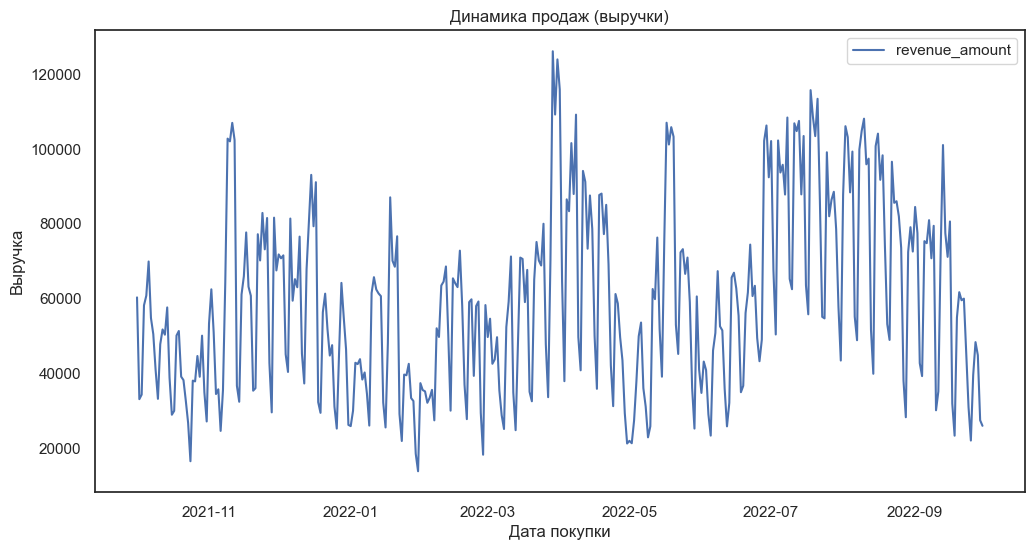

In [1213]:
plt.rcParams['figure.figsize']=12,6
sns.lineplot(data=df_revenue).set(title='Динамика продаж (выручки)', xlabel='Дата покупки', ylabel='Выручка')

Построенный график отражает динамику суммарной выручки по дням, представленным в датафрейме. Теперь детализируем по наличию программы лояльности

In [1214]:
df_revenue_FFP = df.groupby(['issue_date', 'ffp_flag']).sum([['revenue_amount']])
df_revenue_FFP

revenue_amount
issue_date ffp_flag                
2021-10-01 FFP                22150
           No                 38160
2021-10-02 FFP                12080
           No                 21020
2021-10-03 FFP                15570
...                             ...
2022-09-28 No                 28150
2022-09-29 FFP                 5490
           No                 21970
2022-09-30 FFP                 2640
           No                 23340

[730 rows x 1 columns]

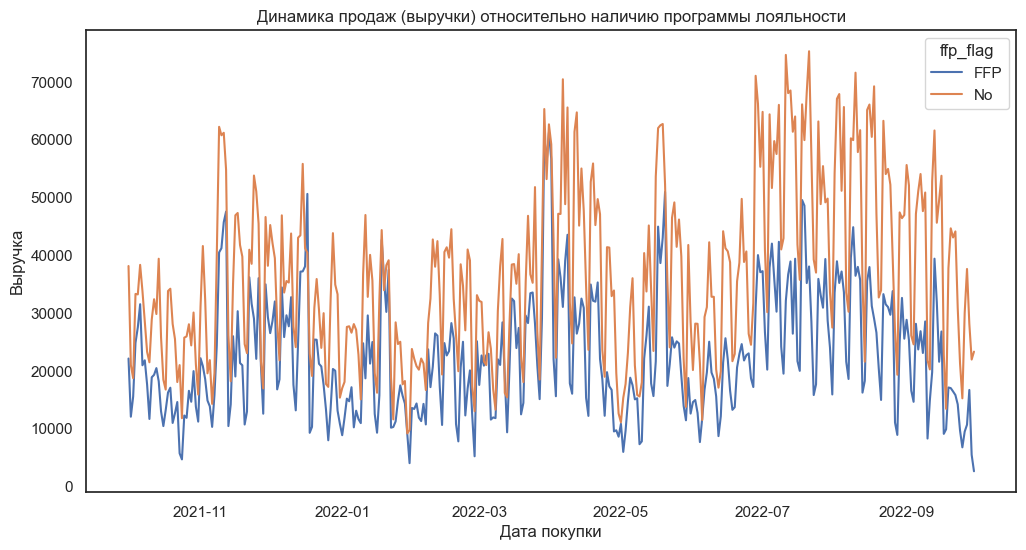

In [1218]:
plt.rcParams['figure.figsize']=12,6
sns.lineplot(data=df_revenue_FFP, x='issue_date', y='revenue_amount', hue='ffp_flag').set(title='Динамика продаж (выручки) относительно наличию программы лояльности', xlabel='Дата покупки', ylabel='Выручка')
plt.show()

На данном графике можно сравнить покупку билетов по программам лояльности и без них. Видим, что билетов не по программме лояльности куплено больше. Кроме того, можно проанализировать типы перелетов

In [1219]:
df_revenue_ROUTE_FLIGHT_TYPE = df.groupby(['issue_date', 'route_flight_type']).sum([['revenue_amount']])
df_revenue_ROUTE_FLIGHT_TYPE

revenue_amount
issue_date route_flight_type                
2021-10-01 ВВЛ                         45710
           МВЛ                         14600
2021-10-02 ВВЛ                         26730
           МВЛ                          6370
2021-10-03 ВВЛ                         25940
...                                      ...
2022-09-28 МВЛ                         13430
2022-09-29 ВВЛ                         22240
           МВЛ                          5220
2022-09-30 ВВЛ                         18980
           МВЛ                          7000

[721 rows x 1 columns]

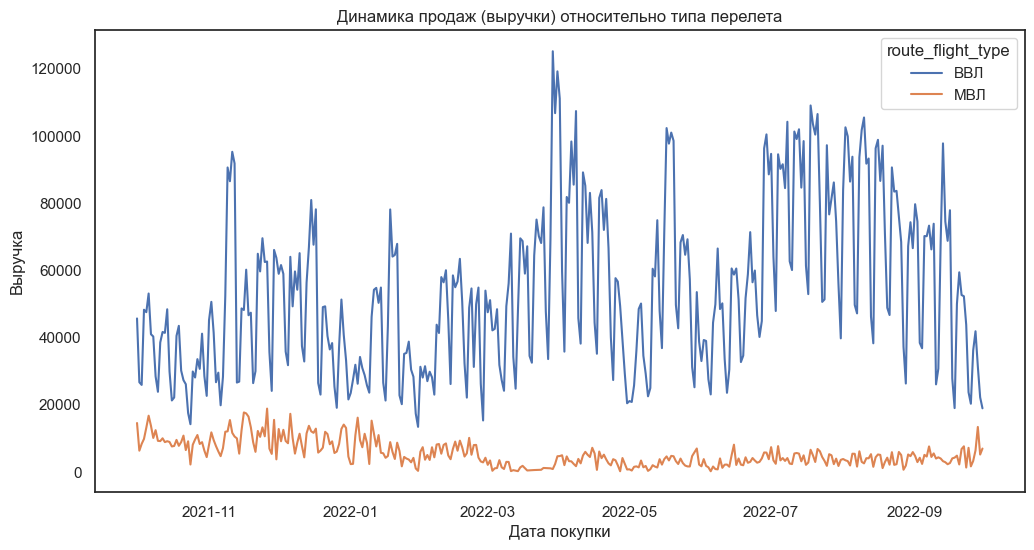

In [1220]:
plt.rcParams['figure.figsize']=12,6
sns.lineplot(data=df_revenue_ROUTE_FLIGHT_TYPE, x='issue_date', y='revenue_amount', hue='route_flight_type').set(title='Динамика продаж (выручки) относительно типа перелета', xlabel='Дата покупки', ylabel='Выручка')
plt.show()

По графику можно сделать вывод, что на долю перелетов по международным воздушным линиям приходится меньше покупок билетов, чем по внутренним. Причем в начале рассматриваемого периода, их было больше, чем в конце, а по билетам на внутренние воздушные линии максимальный спрос был в середине и конце рассматриваемого периода (с марта по май и с июля по август)


In [1221]:
df_revenue_SALE_TYPE = df.groupby(['issue_date', 'sale_type']).sum([['revenue_amount']])
df_revenue_SALE_TYPE

revenue_amount
issue_date sale_type                
2021-10-01 OFFLINE             31530
           ONLINE              28780
2021-10-02 OFFLINE             16180
           ONLINE              16920
2021-10-03 OFFLINE              8270
...                              ...
2022-09-28 ONLINE              18930
2022-09-29 OFFLINE             18880
           ONLINE               8580
2022-09-30 OFFLINE             18160
           ONLINE               7820

[730 rows x 1 columns]

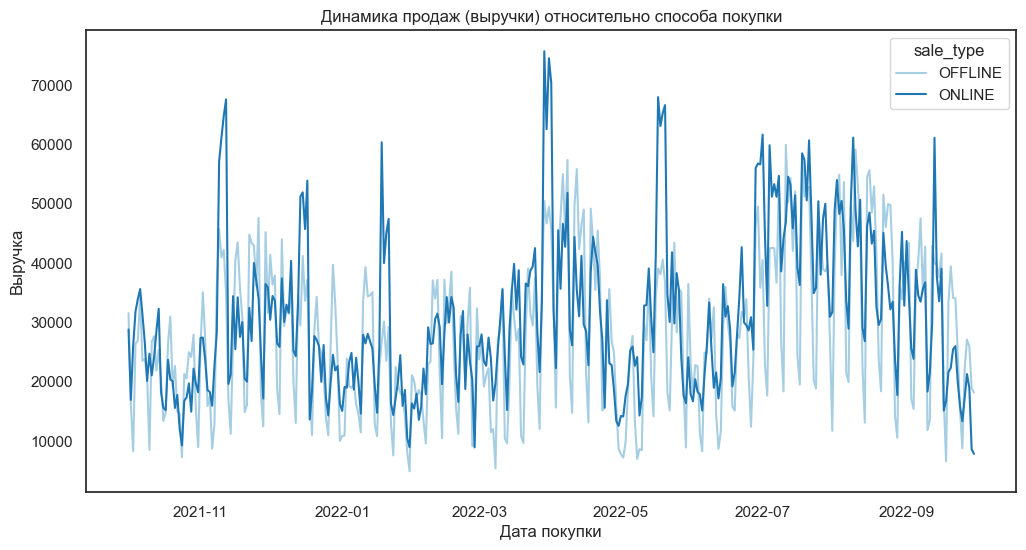

In [1223]:
plt.rcParams['figure.figsize']=(12,6)
sns.lineplot(data=df_revenue_SALE_TYPE, x='issue_date', y='revenue_amount', hue='sale_type', palette='Paired').set(title='Динамика продаж (выручки) относительно способа покупки', xlabel='Дата покупки', ylabel='Выручка')
plt.show()

Выявить четкой зависимости от способа покупки нельзя, но можно сказать, что количество покупок онлайн в среднем превышает количество покупок оффлайн

In [1224]:
df_revenue_PAX_TYPE = df.groupby(['pax_type']).sum([['revenue_amount']])
df_revenue_PAX_TYPE

,revenue_amount
pax_type,
AD,20259210
CHD,1333430
INF,9730


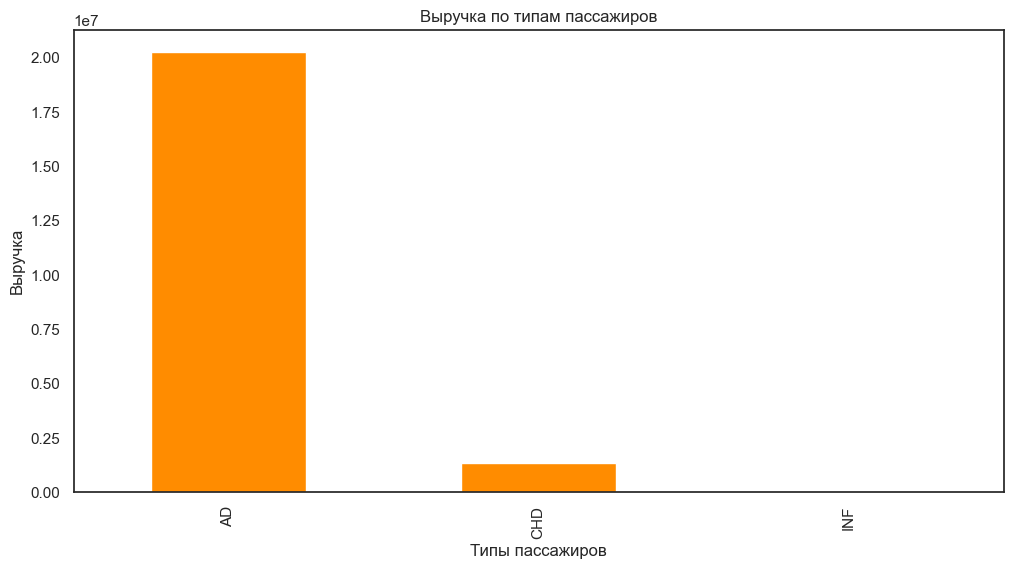

In [1226]:
df_revenue_PAX_TYPE.plot(kind='bar',
                        title='Выручка по типам пассажиров',
                        xlabel='Типы пассажиров',
                        ylabel='Выручка',
                        legend=False,
                        color='darkorange')
plt.show()

Наибольшее число покупок сделали взрослые люди, дети примерно в 15 раз меньше. Количество неопределенных по возрасту покупателей очень мало

In [1227]:
df_revenue_ROUTE_FLIGHT_TYPE = df.groupby(['route_flight_type']).sum([['revenue_amount']])
df_revenue_ROUTE_FLIGHT_TYPE

,revenue_amount
route_flight_type,
ВВЛ,19610480
МВЛ,1991890


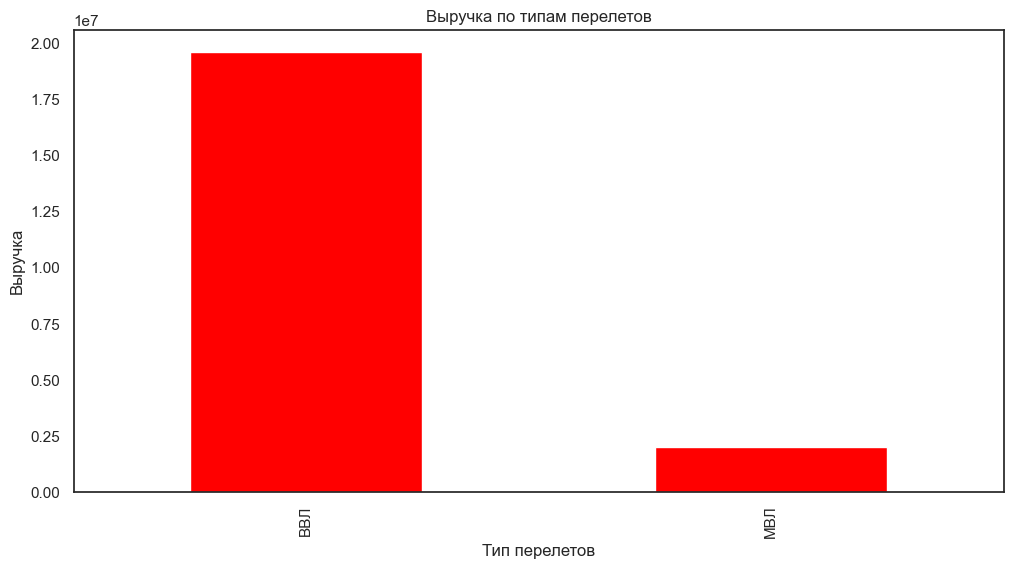

In [1228]:
df_revenue_ROUTE_FLIGHT_TYPE.plot(kind='bar',
                        title='Выручка по типам перелетов',
                        xlabel='Тип перелетов',
                        ylabel='Выручка',
                        legend=False,
                        color='red')
plt.show()

Как было сказано выше и как видно на этом графике количество перелетов по внутренним воздушным линиям намного больше, чем по международным

In [1229]:
df_revenue_way_buy = df.groupby(['sale_type']).sum('revenue_amount')
df_revenue_way_buy

,revenue_amount
sale_type,
OFFLINE,10316900
ONLINE,11285470


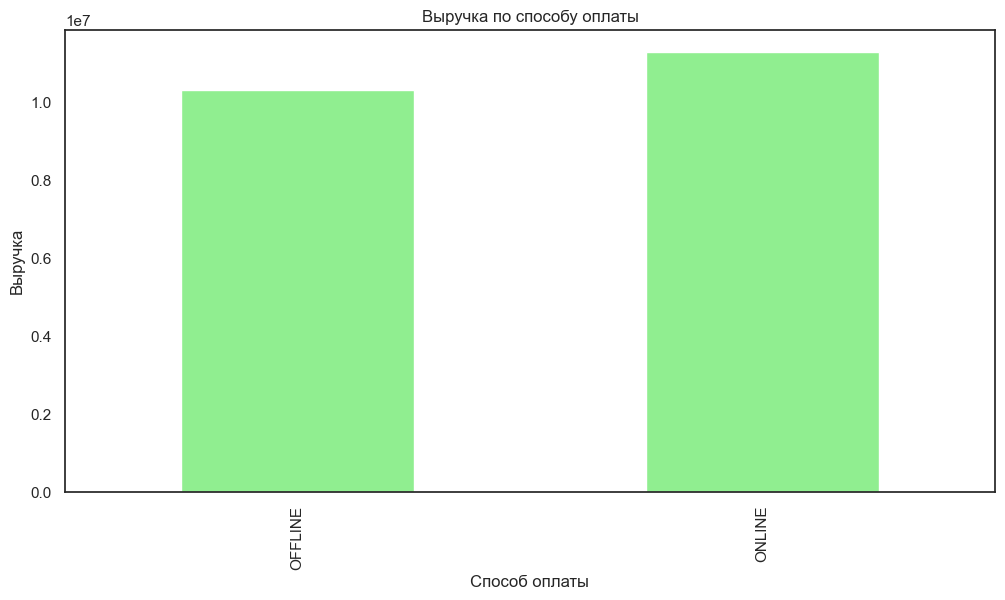

In [1230]:
df_revenue_way_buy.plot(kind='bar',
                        title='Выручка по способу оплаты',
                        xlabel='Способ оплаты',
                        ylabel='Выручка',
                        legend=False,
                        color='lightgreen')
plt.show()

Действительно, оплата онлайн чуть более распространена, чем оплата оффлайн

In [1231]:
df_revenue_FFP = df.groupby(['ffp_flag']).sum('revenue_amount')
df_revenue_FFP

,revenue_amount
ffp_flag,
FFP,8222390
No,13379980


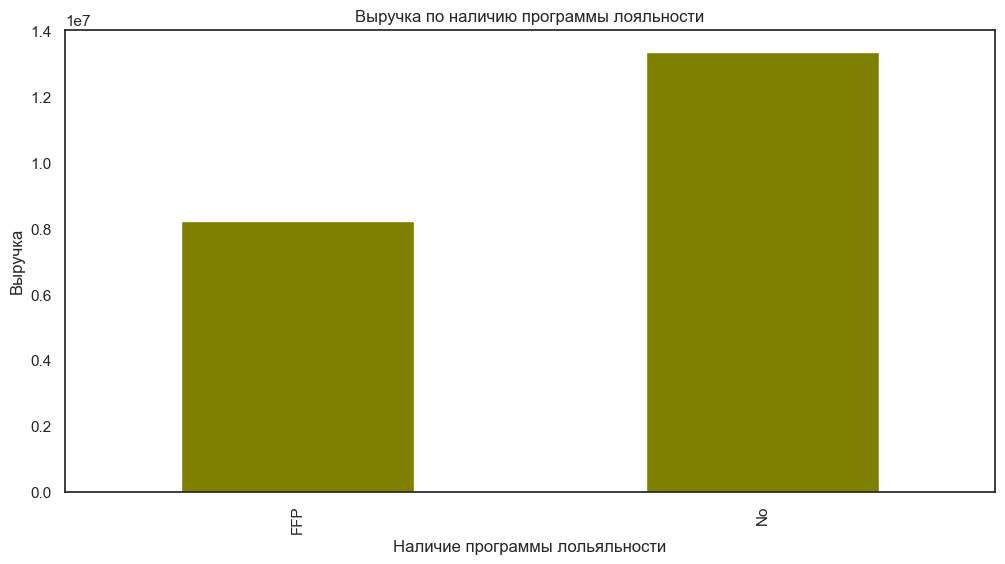

In [1232]:
df_revenue_FFP.plot(kind='bar',
                        title='Выручка по наличию программы лояльности',
                        xlabel='Наличие программы лольяльности',
                        ylabel='Выручка',
                        legend=False,
                        color='olive')
plt.show()

Билеты без программы лояльности покупают примерно в 2 раза больше человек, чем с ней

Думаю, так же стоит рассмотреть совместные гистограммы выручки по способу покупки и наличию программы лояльности, чтобы посмотреть как распределен признак "ffp_flag" от того, как люди покупают - онлайн или оффлайн

In [1233]:
df_revenue_1 = df.groupby(['sale_type', 'ffp_flag']).sum('revenue_amount').reset_index()
df_revenue_1

,sale_type,ffp_flag,revenue_amount
0,OFFLINE,FFP,2307410
1,OFFLINE,No,8009490
2,ONLINE,FFP,5914980
3,ONLINE,No,5370490


C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\3217017880.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['sale_type', 'ffp_flag']).sum()['revenue_amount'].unstack().plot(kind='bar',


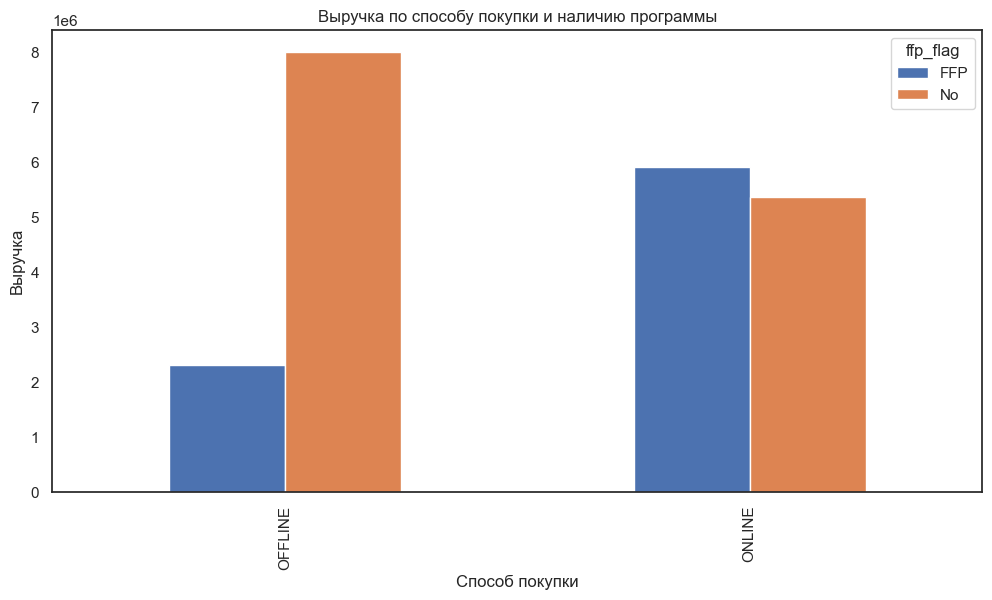

In [1240]:
df_common = pd.DataFrame({'ffp_flag': ['FFP', 'No', 'FFP', 'No'],
                          'sale_type': ['OFFLINE', 'OFFLINE', 'ONLINE', 'ONLINE'],
                          'revenue_amount': [df_revenue_1[0:3], df_revenue_1[1:3], df_revenue_1[2:3], df_revenue_1[3:3]]})

df.groupby(['sale_type', 'ffp_flag']).sum()['revenue_amount'].unstack().plot(kind='bar',
                                                                            xlabel='Способ покупки',
                                                                            ylabel='Выручка',
                                                                            title='Выручка по способу покупки и наличию программы')
plt.show()

По графику видно, что чуть больше половины людей, которые покупают онлайн, пользуются программой лояльности. А люди, покупающие билеты оффлайн, в большинстве случаев делают это без такой программы

### 3.2

Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.

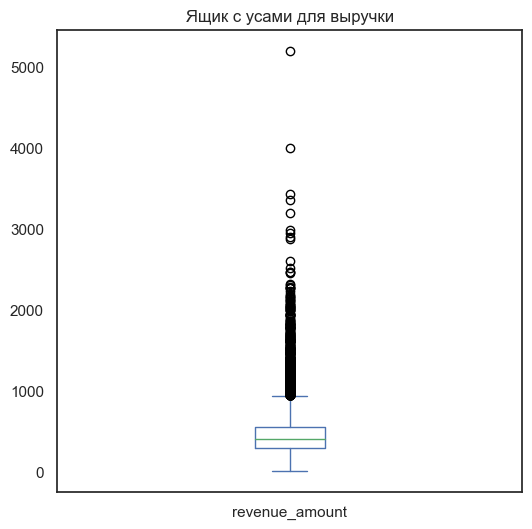

In [1265]:
plt.figure(figsize=(6, 6))
df['revenue_amount'].plot(kind='box', title='Ящик с усами для выручки')
plt.show()

In [1266]:
df['revenue_amount'].describe()

count    49362.000000
mean       437.631579
std        214.611412
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: revenue_amount, dtype: float64

С помощью графика "ящик с усами" и функции describe() по столбцу выручки можно увидеть, что:
- присутствует большое количество выбросов в верхней части графика
- среднее значение и медиана практически равны (437.6 и 400)
- максимальное значение значительно больше данных, находящихся внутри размаха

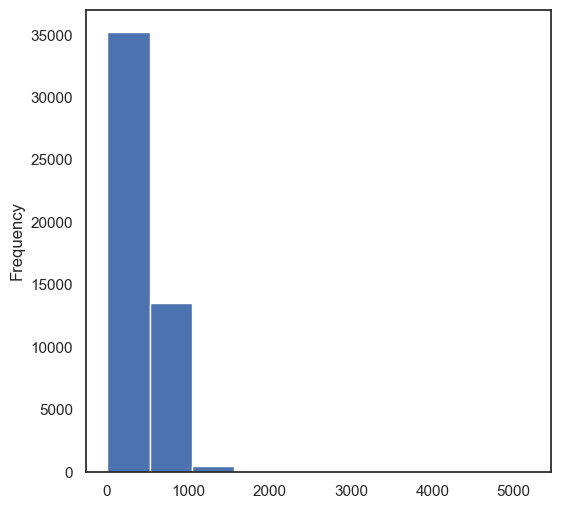

In [1267]:
plt.figure(figsize=(6, 6))
df['revenue_amount'].plot(kind='hist')
figsize=(6,6)

(0.0, 2000.0)

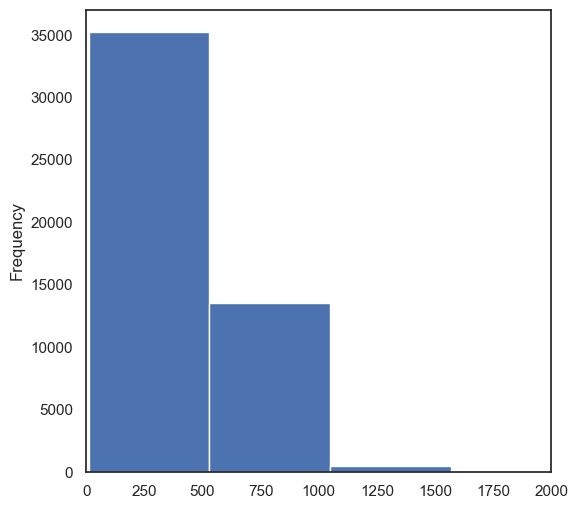

In [1268]:
plt.figure(figsize=(6, 6))
df['revenue_amount'].plot(kind='hist')
plt.xlim(0, 2000)

Основная часть данных имеет значения от 0 до 1500

In [1269]:
total_stat = df['revenue_amount'].describe()
q75 = total_stat['75%']
q25 = total_stat['25%']
iqr = q75-q25 #межквартильный размах
iqr

260.0

In [1270]:
#границы для определения выбросов
iqr_min = q25 - 1.5*iqr
iqr_max = q75 +1.5*iqr
print('Нижняя граница:', iqr_min, 'Верхняя граница:', iqr_max)

Нижняя граница: -100.0 Верхняя граница: 940.0


In [1271]:
ejections_1= df['revenue_amount'][df['revenue_amount'] >= iqr_max].count()
print('Количество выбросов (считая те, которые лежат на границе):', ejections_1)

Количество выбросов (считая те, которые лежат на границе): 1042


In [1272]:
ejections_2 = df['revenue_amount'][df['revenue_amount'] > iqr_max].count()
print('Количество выбросов (не считая тех, которые лежат на границе):', ejections_2)

Количество выбросов (не считая тех, которые лежат на границе): 987


In [1273]:
print('Количество выбросов, которые лежат на границе размаха:', ejections_1 - ejections_2)

Количество выбросов, которые лежат на границе размаха: 55


Значений, которые лежат на границе, не так много относительно всего датасета, поэтому их оставляем при удалении выбросов

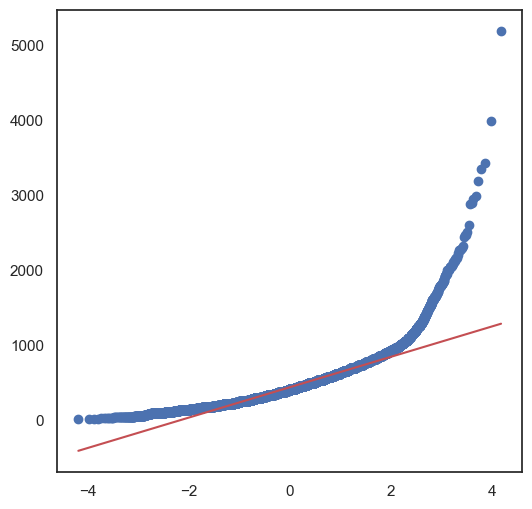

In [1321]:
plt.figure(figsize=(6, 6))
st.probplot(df['revenue_amount'], dist='norm', plot=plt)
plt.show()

Отклонение от линии теоритического идеального распределение в левой части графика объясняется тем, что значение выручки не может быть меньше 0. Однако в то же время, правая часть графика значительно отклоняется от теоретических значений, что связано с наличием выбросов, поэтому необходимо избавиться от них.

In [1285]:
df_1 = df[df['revenue_amount'] <= iqr_max]
df_1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No,OFFLINE


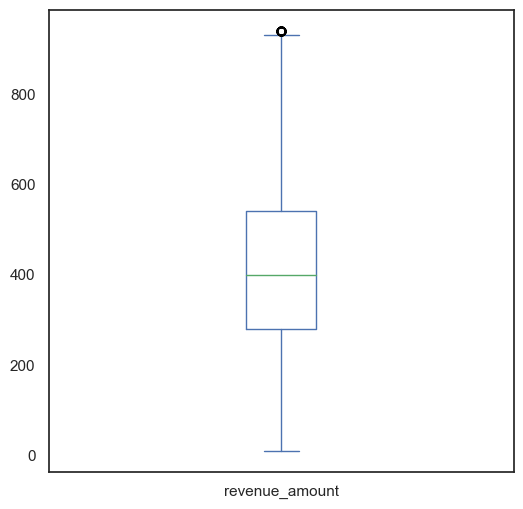

In [1286]:
df_1.plot(kind='box', figsize=(6,6))
plt.show()

Построив "ящик с усами", проверили, что выбросов нет, кроме того, который мы оставили на верхней границе

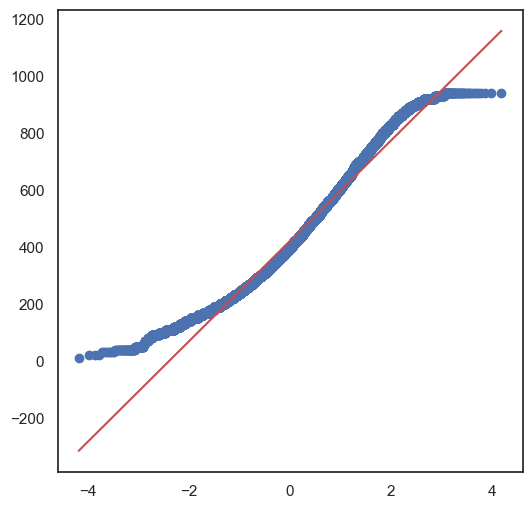

In [1287]:
plt.figure(figsize=(6, 6))
st.probplot(df_1['revenue_amount'], dist='norm', plot=plt)
plt.show()

Построив Q-Q plot видно, что данные хоть и отклоняются от нормального распределения, но не так значительно, как это было с выбросами

In [1288]:
df_1['revenue_amount'].describe()

count    48375.000000
mean       421.941085
std        178.547873
min         10.000000
25%        280.000000
50%        400.000000
75%        540.000000
max        940.000000
Name: revenue_amount, dtype: float64

Благодаря удалению выбросов, которые лежали выше верхней границы, среднее значение стало еще ближе к медиане, а стандартное отклонение уменьшилось до 178.5, что улучшило качество данных

### 3.3

Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.

In [1289]:
df_1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No,OFFLINE


In [1290]:
df_month = df_1.groupby(df_1['issue_date'].dt.month).sum([['revenue_amount']]).reset_index()
df_month

,issue_date,revenue_amount
0,1,1304090
1,2,1297190
2,3,1759960
3,4,1934200
4,5,1651680
5,6,1538600
6,7,2447960
7,8,2220920
8,9,1542980
9,10,1280870


In [1291]:
season = {1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring', 6:'Summer', 7:'Summer', 8:'Summer', 9:'Autumn', 10:'Autumn', 11:'Autumn', 12:'Winter'}

In [1292]:
df_month['season'] = df_month['issue_date'].map(season)
df_month

,issue_date,revenue_amount,season
0,1,1304090,Winter
1,2,1297190,Winter
2,3,1759960,Spring
3,4,1934200,Spring
4,5,1651680,Spring
5,6,1538600,Summer
6,7,2447960,Summer
7,8,2220920,Summer
8,9,1542980,Autumn
9,10,1280870,Autumn


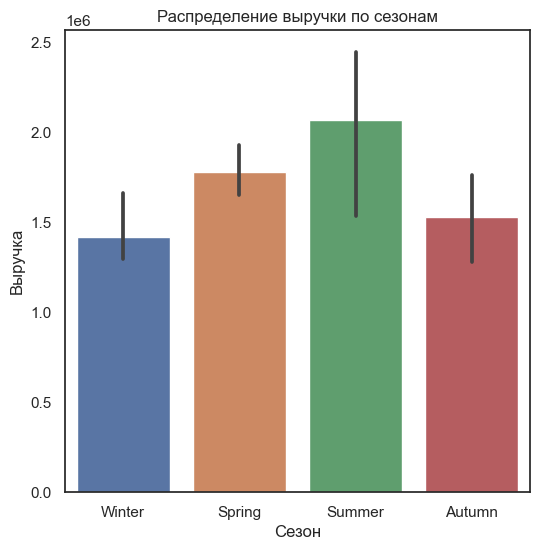

In [1294]:
plt.rcParams['figure.figsize']=6,6
sns.barplot(data=df_month, y='revenue_amount', x='season').set(title='Распределение выручки по сезонам', xlabel='Сезон', ylabel='Выручка')
plt.show()

Глядя на график, можно сделать вывод, что наибольший спрос на билеты летом, что объясняется отпусками многих работников и теплой погодой. Весной выручка с продажи билетов чуть ниже, а осенью и зимой самая низкая. Это связано с тем, что зимой люди преимущественно отдыхают в своем городе или регионе, а осенью большинство сотрудников активно занимаются рабочими делами после летнего сезона отпусков 

In [1295]:
df_1['season'] = df_1['issue_date'].dt.month.map(season)
df_1

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\2144754151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['season'] = df_1['issue_date'].dt.month.map(season)


,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,season
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No,ONLINE,Winter
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No,OFFLINE,Winter
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,Autumn
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No,ONLINE,Winter
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,Winter
...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No,ONLINE,Summer
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No,OFFLINE,Summer
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,Summer
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No,OFFLINE,Summer


C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\3501431036.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[df_1['season'] == 'Autumn']['revenue_amount']).set(title='Функция плотности выручки осенью', xlabel='Выручка', ylabel='Плотность распределения')


[Text(0.5, 1.0, 'Функция плотности выручки осенью'),
 Text(0.5, 0, 'Выручка'),
 Text(0, 0.5, 'Плотность распределения')]

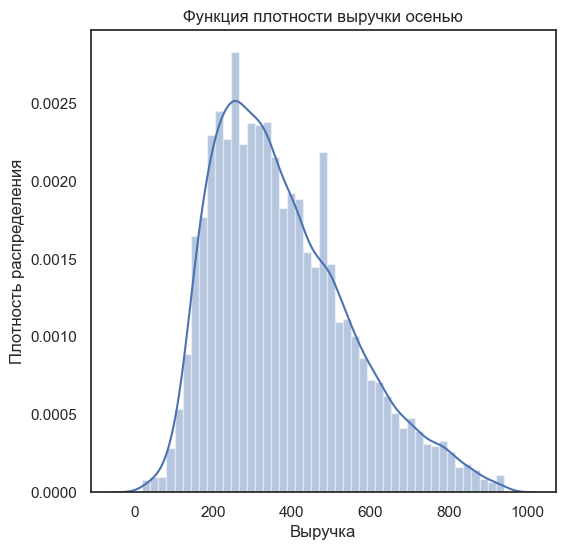

In [1560]:
plt.rcParams['figure.figsize']=6,6
sns.distplot(df_1[df_1['season'] == 'Autumn']['revenue_amount']).set(title='Функция плотности выручки осенью', xlabel='Выручка', ylabel='Плотность распределения')

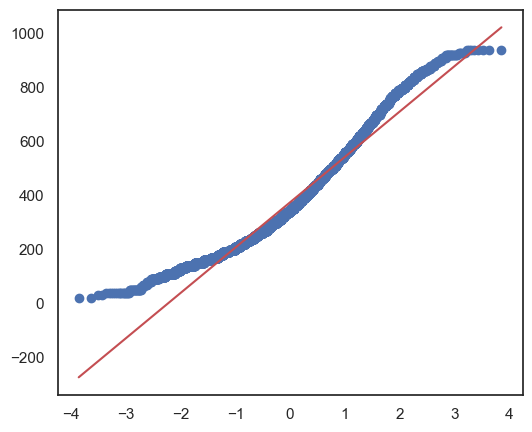

In [1558]:
plt.figure(figsize=(6, 5)) #Q-Q plot для значения выручки осенью
st.probplot(df_1[df_1['season'] == 'Autumn']['revenue_amount'], dist='norm', plot=plt)
plt.show()

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\1150134557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[df_1['season'] == 'Winter']['revenue_amount']).set(title='Функция плотности выручки зимой', xlabel='Выручка', ylabel='Плотность распределения')


[Text(0.5, 1.0, 'Функция плотности выручки зимой'),
 Text(0.5, 0, 'Выручка'),
 Text(0, 0.5, 'Плотность распределения')]

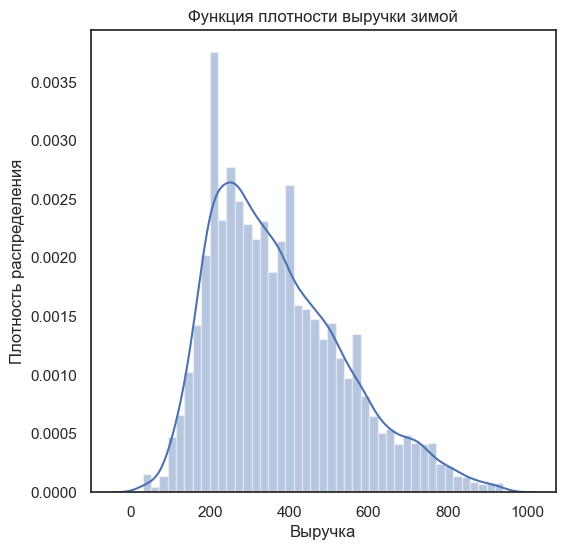

In [1561]:
sns.distplot(df_1[df_1['season'] == 'Winter']['revenue_amount']).set(title='Функция плотности выручки зимой', xlabel='Выручка', ylabel='Плотность распределения')

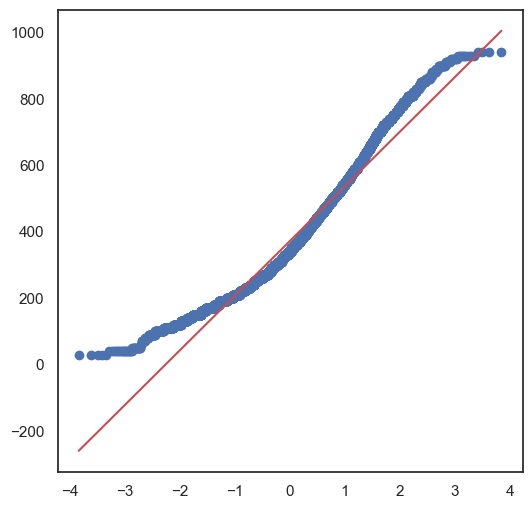

In [1562]:
plt.figure(figsize=(6, 6)) #Q-Q plot для значения выручки зимой
st.probplot(df_1[df_1['season'] == 'Winter']['revenue_amount'], dist='norm', plot=plt)
plt.show()

Построили график функции плотности распределения и Q-Q plot для выручки в осенний и зимний период. Согласно получившимся графикам распределение нельзя назвать нормальным, так как в обоих случаях данные отклоняются от нормального распределения

Так же можно было бы проверить нормальность распределения по тесту Шапиро-Уилка, но в датафрейме огромное количество данных для этого теста, поэтому остановимся только на визуальной проверке на нормальность

H0: выручки от продаж осенью и зимой равны

H1: выручки от продаж осенью и зимой отличаются

Так как мы проверяем гипотезу между двумя независимыми выборками и распределение этих данных нельзя назвать нормальным, то используем непараметрический тест Уилкоксона-Манна-Уитни

In [1328]:
#проводим тест по исходному датафрейму, в который добавлен столбец season
results = st.mannwhitneyu(df_1[df_1['season'] == 'Autumn']['revenue_amount'], df_1[df_1['season'] == 'Winter']['revenue_amount'])

print('p-value:', results.pvalue)

if results.pvalue < 0.05:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 0.4549933504837227
Нет оснований отклонить нулевую гипотезу


Таким образом, мы принимаем нулевую гипотезу с вероятностью 0.95, то есть выручки от продаж осенью и зимой не отличаются

In [1329]:
df_2 = df_1

In [1330]:
df_2['month'] = df_2['issue_date'].dt.month
df_month_1 = pd.pivot_table(df_2, values='revenue_amount', index=['month'], aggfunc={'sum', 'count'})
df_month_1

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\20147690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['month'] = df_2['issue_date'].dt.month


,count,sum
month,,
1,3552,1304090
2,3414,1297190
3,4275,1759960
4,3887,1934200
5,3563,1651680
6,3287,1538600
7,5093,2447960
8,4571,2220920
9,3555,1542980


In [1331]:
df_month_1['sum'].max()

2447960

In [1332]:
df_month_1['count'].max()

5109

In [1333]:
df_month_1.reset_index().corr()

,month,count,sum
month,1.000000,0.461072,0.192032
count,0.461072,1.000000,0.753134
sum,0.192032,0.753134,1.000000


Связь между месяцем и количеством проданных билетов является умеренной, а между месяцем и выручкой - слабой (по шкале Чеддока). В то же время связь между количеством проданных билетов и суммой выручки характеризуется высокой теснотой связи, что достаточно объяснимо, ведь выручка напрямую завиисит от количества продаж

[Text(0.5, 1.0, 'Распределение выручки по месяцам'),
 Text(0.5, 0, 'Месяц'),
 Text(0, 0.5, 'Выручка')]

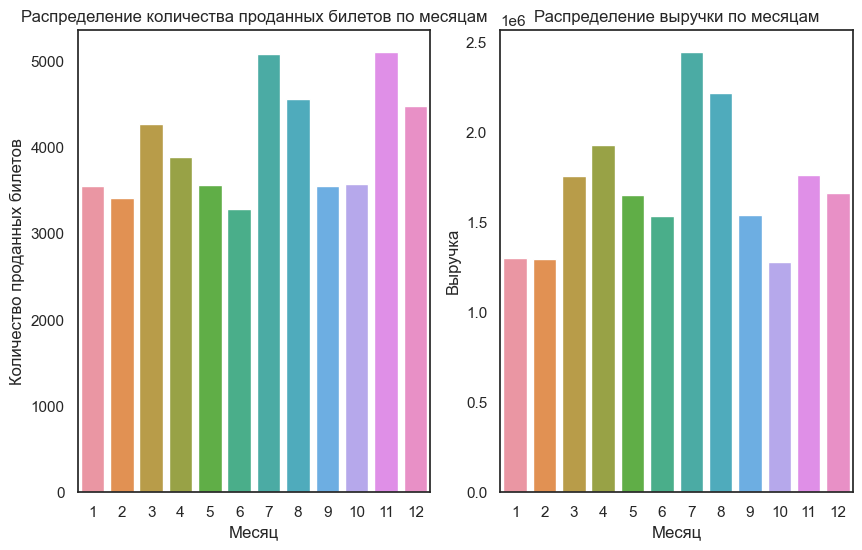

In [1335]:
plt.rcParams['figure.figsize']=10,6
fid,ax = plt.subplots(1,2)

sns.barplot(data=df_month_1.reset_index(), y='count', x='month', ax=ax[0]).set(title='Распределение количества проданных билетов по месяцам', xlabel='Месяц', ylabel='Количество проданных билетов')
sns.barplot(data=df_month_1.reset_index(), y='sum', x='month', ax=ax[1]).set(title='Распределение выручки по месяцам', xlabel='Месяц', ylabel='Выручка')

[Text(0.5, 1.0, 'Количество проданных билетов по месяцам'),
 Text(0.5, 0, 'Месяц покупки'),
 Text(0, 0.5, 'Количество билетов')]

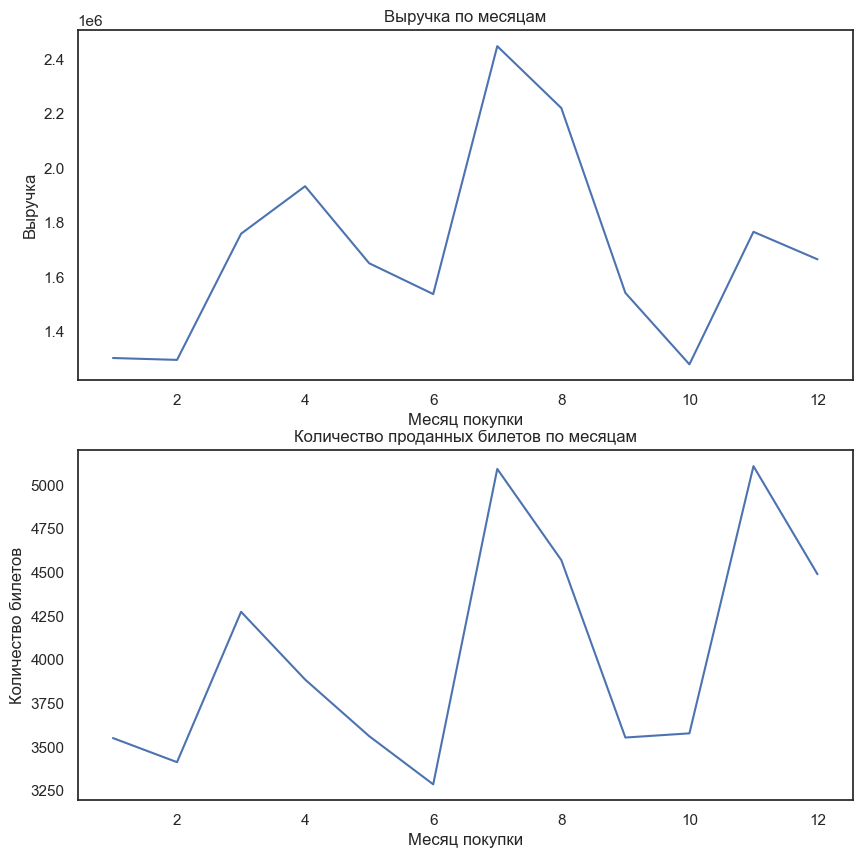

In [1336]:
plt.rcParams['figure.figsize']=10,10
fid,ax = plt.subplots(2,1)

sns.lineplot(data=df_month_1['sum'], ax=ax[0]).set(title='Выручка по месяцам', xlabel='Месяц покупки', ylabel='Выручка')
sns.lineplot(data=df_month_1['count'], ax=ax[1]).set(title='Количество проданных билетов по месяцам', xlabel='Месяц покупки', ylabel='Количество билетов')

Выручка от продажи билетов в январе и феврале растет медленными темпами до апреля. Причем сравнивая график выручки с количеством проданных биллетов, можно понять, что выручка продолжала расти с марта по апрель только благодаря росту цен на билеты, а не увеличению количества самих продаваемых билетов, но в этот период уже заметно замедление темпа роста выручки. После апреля показатель выручки начинает падать (может быть обусловлен снижением количества продаваемых билетов), а с июня снова идет на увеличение быстрыми темпами, поэтому в июле (самый разгар туристического сезона) наблюдается наибольшее значение выручки - 2447960. Далее до самой осени значение показателя снижается, и в октябре наблюдается наименьшее значение выручки - 1280870. Это связано с низким спросом на отдых и путешествия среди туристов в осенний период. В ноябре спрос на билеты растет, так как многие уезжают на ноябрьские праздники, а также покупают билеты на новогодние каникулы. В зимний же период выручка от продажи билетов невысокая, так как зимой (те, кто раньше не купили билеты) предпочитают отдыхать в своем городе или регионе

В январе и феврале количество проданных билетов не очень большое, в марте оно чуть выше, но затем медленно идет на спад до самого лета. Наибольшее количество билетов продано в июле (самый разгар летнего сезона), а с августа и по октябрь показатель снижается. Далее в ноябре наблюдается наибольшее количество проданных билетов, что связано с покупкой билетов на ноябрьские праздники и зимние каникулы. В зимний сезон количество проданных билетов уменьшается.

### 3.4

Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.

In [1337]:
df_1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,season,month
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No,ONLINE,Winter,12
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No,OFFLINE,Winter,12
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,Autumn,11
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No,ONLINE,Winter,12
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,Winter,12
...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No,ONLINE,Summer,6
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No,OFFLINE,Summer,6
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,Summer,6
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No,OFFLINE,Summer,6


In [1338]:
period = (df_1['flight_date_loc'] - df_1['issue_date']).dt.days
period.unique()

array([ 35,   3,  37,  28,  46,  34,  40,  39,  49,  45,  26,  42,  48,
        38,  36,  20,   4,  24,  25,  55,  54,  41,  60,  10,  32,  47,
        53,  12,  52,  33,  22,  17,  30,   7,  31,  56,  27,  23,  15,
        43,  29,  51,  57,  63,  50,  21,   6,  19,   5,   1,  44,   2,
        18,   8,  13,   9,  16,  14,  11,   0,  74,  58, 123,  62, 118,
       297, 110, 109, 251, 291, 293, 265, 304, 264, 282, 242, 262, 268,
       243, 128, 244, 230, 235, 245, 228, 249, 229, 221, 186, 231, 248,
       208, 215, 202, 198, 222, 199, 169, 195, 216, 173, 207, 179, 196,
       220, 212, 214, 209, 200, 217, 201, 203, 226, 187, 178, 192, 177,
       204, 189, 180, 175, 190, 205, 184, 163, 181, 174,  94,  67, 191,
       172, 156, 188, 136, 183, 171, 182,  86, 134, 170, 159, 176, 194,
        68, 165, 168, 121, 105, 137, 152, 143, 154, 116, 114, 151, 139,
       157, 162, 146, 145, 153,  66, 140, 148, 149, 166, 135, 150, 147,
       141, 125, 124, 133, 126, 131, 144, 115, 138, 119, 120, 12

In [1339]:
p_min = period.min()
p_max = period.max()
print('Минимальное число дней, за которое были куплены билеты:', p_min)
print('Максимальное число дней, за которое были куплены билеты:', p_max)

Минимальное число дней, за которое были куплены билеты: 0
Максимальное число дней, за которое были куплены билеты: 317


Перед разделением на группы я ознакомилась с некоторыми материалами касаемо покупки билетов и узнала следующее:
- в среднем авиакомпании начинают продажу билетов за 330 дней до вылета
- опытные путешественники советуют мониторить цену и покупать билета в среднем за 2 месяца до вылета

Разбивать данный список на группы обычным делением поровну нелогично, так как есть разница даже между "покупать билеты за неделю" и "за 2 дня до вылета". Поэтому разобьем список на группы следующим образом:
1) от 0 до 2 дней (срочная покупка билета)
2) от 3 до 7 дней (покупка немного заранее)
3) от 8 дней до 1 месяца (покупка относительно заранее)
4) от 1 месяца до 3  месяцев (оптимальная покупка согласно совету опытных путешественников)
5) от 3 месяцев до 330 дней (покупка заранее)

In [1340]:
df_1['days'] = (df_1['flight_date_loc'] - df_1['issue_date']).dt.days
df_1

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\1837337585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['days'] = (df_1['flight_date_loc'] - df_1['issue_date']).dt.days


,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,season,month,days
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No,ONLINE,Winter,12,35
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No,OFFLINE,Winter,12,3
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,Autumn,11,37
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No,ONLINE,Winter,12,28
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,Winter,12,35
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No,ONLINE,Summer,6,11
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No,OFFLINE,Summer,6,14
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,Summer,6,3
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No,OFFLINE,Summer,6,2


In [1341]:
df_1.loc[(df_1['days'] <= 2, 'group')] = '1'
df_1.loc[((df_1['days'] >= 3) & (df_1['days'] <= 7), 'group')] = '2'
df_1.loc[((df_1['days'] >= 8) & (df_1['days'] <= 31), 'group')] = '3'
df_1.loc[((df_1['days'] >= 32) & (df_1['days'] <= 92), 'group')] = '4'
df_1.loc[((df_1['days'] >= 93), 'group')] = '5'
df_1

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\3398002467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[(df_1['days'] <= 2, 'group')] = '1'


,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,season,month,days,group
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No,ONLINE,Winter,12,35,4
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No,OFFLINE,Winter,12,3,2
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,Autumn,11,37,4
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No,ONLINE,Winter,12,28,3
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,Winter,12,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No,ONLINE,Summer,6,11,3
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No,OFFLINE,Summer,6,14,3
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,Summer,6,3,2
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No,OFFLINE,Summer,6,2,1


In [1342]:
df_group = df_1.groupby('group')['revenue_amount'].count()
df_group

group
1     8899
2    12315
3    17754
4     7502
5     1905
Name: revenue_amount, dtype: int64

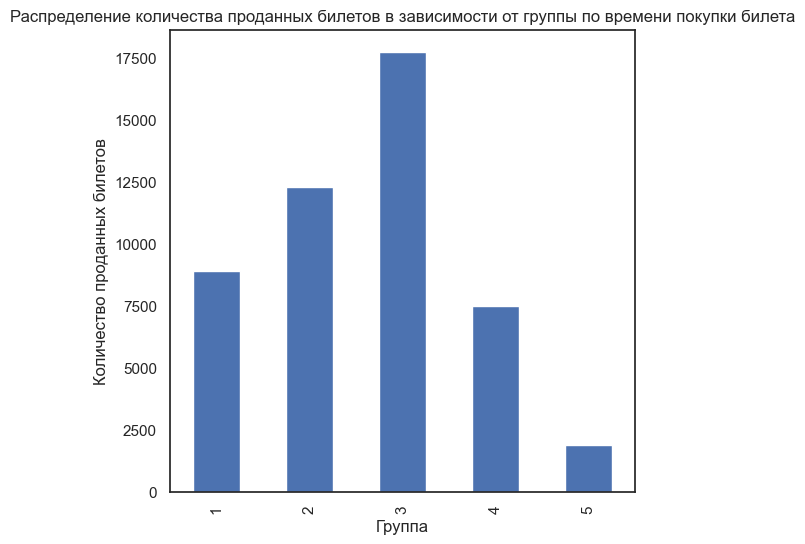

In [1343]:
df_group.plot(kind='bar',
              figsize=(6,6),
              title='Распределение количества проданных билетов в зависимости от группы по времени покупки билета',
              legend=False,
              xlabel='Группа',
              ylabel='Количество проданных билетов')
plt.show()

Смотря на гистограмму, делаем вывод, что большинство покупателей приобретают билеты за 8-31 день, то есть относительно заранее, потому что в таком случае люди более уверены в том, что они смогут полететь, но в то же время цена на билеты остается на разумном уровне. Также много билетов (около 12500) было куплено за 3-7 дней до вылета и около 9000 билетов были куплены как срочная покупка (до 2 дней до вылета). А минимальное количество билетов куплено более чем за 3 месяца до вылета.

In [1344]:
df_group_sum = df_1.groupby('group')['revenue_amount'].sum()
df_group_sum

group
1    3567880
2    5177850
3    7545060
4    3256580
5     864030
Name: revenue_amount, dtype: int64

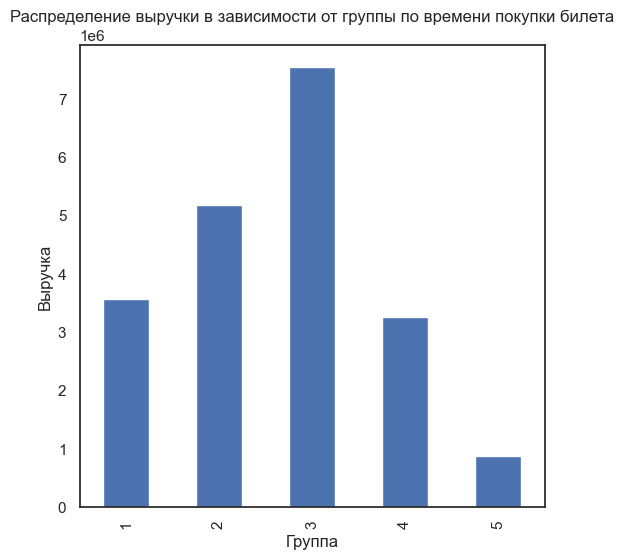

In [1345]:
df_group_sum.plot(kind='bar',
                  figsize=(6,6),
                  title='Распределение выручки в зависимости от группы по времени покупки билета',
                  legend=False,
                  xlabel='Группа',
                  ylabel='Выручка')
plt.show()

По характеру распределения по группам итоговые показатели выручки не отличаются от показателей количества билетов: наибольшая выручка наблюдается по билетам, которые куплены в период от 8 дней до 1 месяца до вылета, а наименьшая - по билетам, которые куплены более чем за 3 месяца до вылета

In [1346]:
df_group_1 = pd.pivot_table(df_1, values='revenue_amount', index=['group'], aggfunc={'sum', 'count'})
df_group_1

,count,sum
group,,
1,8899,3567880
2,12315,5177850
3,17754,7545060
4,7502,3256580
5,1905,864030


In [1347]:
df_group_1.corr()

,count,sum
count,1.000000,0.998979
sum,0.998979,1.000000


Тот факт, что характер распределения по группам итоговых показателей выручки не отличаются от показателей количества билетов объясняется весьма высокой теснотой связи между этими показателями: 0.998979

Теперь проверим гипотезу о том, что выручка от продажи билетов, которые куплены заранее и которые куплены в последний момент, отличаются

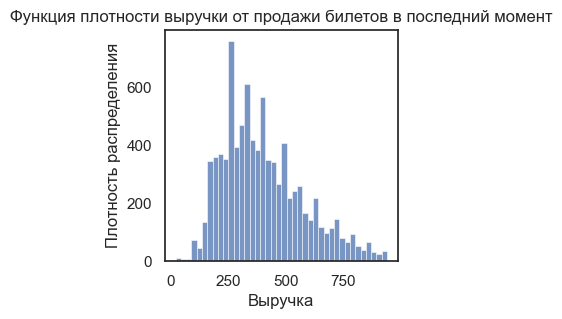

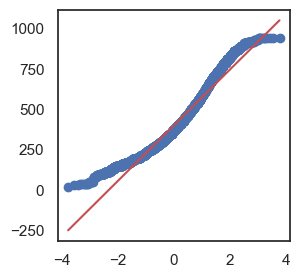

In [1554]:
plt.rcParams['figure.figsize']=3,3
sns.histplot(df_1[df_1['group'] == '1']['revenue_amount']).set(title='Функция плотности выручки от продажи билетов в последний момент', xlabel='Выручка', ylabel='Плотность распределения')

plt.figure(figsize=(3, 3))
st.probplot(df_1[df_1['group'] == '1']['revenue_amount'], dist='norm', plot=plt) #Q-Q plot для значения выручки от продажи билетов в последний момент
plt.show()

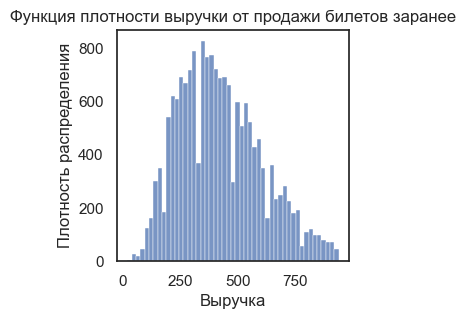

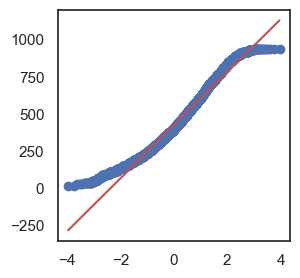

In [1553]:
plt.rcParams['figure.figsize']=3,3
sns.histplot(df_1[df_1['group'] == '3']['revenue_amount']).set(title='Функция плотности выручки от продажи билетов заранее', xlabel='Выручка', ylabel='Плотность распределения')

plt.figure(figsize=(3, 3))
st.probplot(df_1[df_1['group'] == '3']['revenue_amount'], dist='norm', plot=plt) #Q-Q plot для значения выручки от продажи билетов заранее
plt.show()

Перед проверкой гипотезы необходимо проанализировать нормальность распределения, что мы и сделали с помощью графиков функции плотности и Q-Q plot. Глядя на графики, можно сделать вывод, что данные не имеют нормального распределения, это влияет на характер проведения теста

H0: выручка от продажи билетов в последний момент равна выручке от продажи билетов заранее

H1: выручка от продажи билетов в последний момент и выручка от продажи билетов заранее отличаются

Группа 1 характеризует покупку билетов в последний момент, а группа 3 - оптимальную продажу билетов заранее, сравним именно эти 2 группы

Так как мы проверяем гипотезу между двумя независимыми выборками и распределение этих данных нельзя назвать нормальным, то используем непараметрический тест Уилкоксона-Манна-Уитни

In [1350]:
#проводим тест по исходному датафрейму, в который добавлен столбец season
results = st.mannwhitneyu(df_1[df_1['group'] == '1']['revenue_amount'], df_1[df_1['group'] == '3']['revenue_amount'])

print('p-value:', results.pvalue)

if results.pvalue < 0.05:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 5.7801946564207164e-30
Отклоняем нулевую гипотезу


Таким образом, отклоняем нулевую гипотезу с вероятностью 0.95, то есть выручка от продажи билетов в последний момент и выручка от продажи билетов заранее отличаются, что достаточно логично, так как существует много факторов, влияющих на цену билетов и количество их продаж, один из которых формирование цены в зависимости от спроса и предложения в данный момент времени.

### 3.5

Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета: https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

In [1351]:
column = ['Airport Name', 'City', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Atitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
df_city = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', names = column)
df_city

,Airport Name,City,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Atitude,Timezone,DST,Timezone Region,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [1352]:
df_city_name = df_city[['City', 'IATA_Code']]
df_city_name


,City,IATA_Code
1,Goroka,GKA
2,Madang,MAG
3,Mount Hagen,HGU
4,Nadzab,LAE
5,Port Moresby,POM
...,...,...
14106,Belaya,\N
14107,Ulan Ude,\N
14108,Novgorod,\N
14109,Copiapo,CPO


In [1353]:
mapping = {'SVO': 'MOW', 'DME': 'MOW', 'VKO': 'MOW', 'BKA': 'MOW', 'OSF': 'MOW'}
df_city_name['IATA_Code'] = df_city_name['IATA_Code'].replace(mapping)
#так как в Москве есть 3 аэропорта, у каждого из них свой код, но при использовании функции merge программа выдает пропуск
#поэтому мы заменяем коды всех московских аэропортов на MOW, так как в данном задании нас интересует именно город

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\2048878149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_name['IATA_Code'] = df_city_name['IATA_Code'].replace(mapping)


In [1354]:
df_city_name.loc[df_city_name['City'] == 'Moscow'].IATA_Code 

2985     MOW
2988     MOW
4029     MOW
4360     MOW
8661     MOW
11986     \N
Name: IATA_Code, dtype: object

In [1355]:
#по внутренним воздушным линиям
df_1_vvl = df_1.loc[df_1['route_flight_type'] == 'ВВЛ'][['issue_date', 'revenue_amount', 'orig_city_code', 'dest_city_code']]
df_1_vvl['Города из-в'] = df_1_vvl['orig_city_code'] + '-' + df_1_vvl['dest_city_code']
df_1_vvl

,issue_date,revenue_amount,orig_city_code,dest_city_code,Города из-в
0,2021-12-07,200,MOW,KGD,MOW-KGD
1,2021-12-31,610,UUS,OVB,UUS-OVB
2,2021-11-28,390,KGD,MOW,KGD-MOW
3,2021-12-08,190,VOZ,MOW,VOZ-MOW
4,2021-12-08,190,MOW,KRR,MOW-KRR
...,...,...,...,...,...
49995,2022-06-11,480,MOW,OMS,MOW-OMS
49996,2022-06-06,270,LED,MOW,LED-MOW
49997,2022-06-26,230,MOW,KZN,MOW-KZN
49998,2022-06-26,270,KZN,MOW,KZN-MOW


In [1356]:
df_VVL_city = df_1_vvl.groupby(['Города из-в','orig_city_code', 'dest_city_code']).agg({'revenue_amount': 'sum', 'issue_date': 'count'}).reset_index()
df_VVL_city = df_VVL_city.rename(columns={'issue_date': 'Count'})
df_VVL_city = df_VVL_city.sort_values(by='Count', ascending=False).head(10)
df_VVL_city
#создаем ТОП-10 направлений, считаем для них сумму выручки и количество проданных билетов

,Города из-в,orig_city_code,dest_city_code,revenue_amount,Count
7,AER-MOW,AER,MOW,513970,1326
101,MOW-AER,MOW,AER,480480,1292
91,LED-MOW,LED,MOW,280870,1211
122,MOW-LED,MOW,LED,273720,1190
211,OVB-MOW,OVB,MOW,460720,967
139,MOW-OVB,MOW,OVB,440440,944
86,KZN-MOW,KZN,MOW,205230,759
121,MOW-KZN,MOW,KZN,204660,757
153,MOW-UFA,MOW,UFA,210610,708
189,OVB-AER,OVB,AER,382470,668


In [1357]:
df_VVL_city = df_VVL_city.merge(df_city_name, how = 'left', left_on=['orig_city_code'], right_on=['IATA_Code'])
df_VVL_city = df_VVL_city.merge(df_city_name, how = 'left', left_on=['dest_city_code'], right_on=['IATA_Code'])
df_VVL_city = df_VVL_city.drop_duplicates()
df_VVL_city
#объединяем 2 датафрейма, чтобы соединить между собой код и название города

,Города из-в,orig_city_code,dest_city_code,revenue_amount,Count,City_x,IATA_Code_x,City_y,IATA_Code_y
0,AER-MOW,AER,MOW,513970,1326,Sochi,AER,Moscow,MOW
5,MOW-AER,MOW,AER,480480,1292,Moscow,MOW,Sochi,AER
10,LED-MOW,LED,MOW,280870,1211,St. Petersburg,LED,Moscow,MOW
15,MOW-LED,MOW,LED,273720,1190,Moscow,MOW,St. Petersburg,LED
20,OVB-MOW,OVB,MOW,460720,967,Novosibirsk,OVB,Moscow,MOW
25,MOW-OVB,MOW,OVB,440440,944,Moscow,MOW,Novosibirsk,OVB
30,KZN-MOW,KZN,MOW,205230,759,Kazan,KZN,Moscow,MOW
35,MOW-KZN,MOW,KZN,204660,757,Moscow,MOW,Kazan,KZN
40,MOW-UFA,MOW,UFA,210610,708,Moscow,MOW,Ufa,UFA
45,OVB-AER,OVB,AER,382470,668,Novosibirsk,OVB,Sochi,AER


In [1358]:
df_VVL_city = df_VVL_city.drop(columns = ['IATA_Code_x', 'IATA_Code_y'], axis = 1)
df_VVL_city.columns = ['Route', 'departure_city', 'destination_city', 'Sum', 'Count', 'departure_city_name', 'destination_city_name']
df_VVL_city['Route_city'] = df_VVL_city['departure_city_name'] + '-' + df_VVL_city['destination_city_name']
df_VVL_city
#удаляю лишние столбцы, чтобы не мешать восприятию информации из датафрейма, и создала дополнительный столбец с направлением, но уже по городам, а не по кодам

,Route,departure_city,destination_city,Sum,Count,departure_city_name,destination_city_name,Route_city
0,AER-MOW,AER,MOW,513970,1326,Sochi,Moscow,Sochi-Moscow
5,MOW-AER,MOW,AER,480480,1292,Moscow,Sochi,Moscow-Sochi
10,LED-MOW,LED,MOW,280870,1211,St. Petersburg,Moscow,St. Petersburg-Moscow
15,MOW-LED,MOW,LED,273720,1190,Moscow,St. Petersburg,Moscow-St. Petersburg
20,OVB-MOW,OVB,MOW,460720,967,Novosibirsk,Moscow,Novosibirsk-Moscow
25,MOW-OVB,MOW,OVB,440440,944,Moscow,Novosibirsk,Moscow-Novosibirsk
30,KZN-MOW,KZN,MOW,205230,759,Kazan,Moscow,Kazan-Moscow
35,MOW-KZN,MOW,KZN,204660,757,Moscow,Kazan,Moscow-Kazan
40,MOW-UFA,MOW,UFA,210610,708,Moscow,Ufa,Moscow-Ufa
45,OVB-AER,OVB,AER,382470,668,Novosibirsk,Sochi,Novosibirsk-Sochi


In [1359]:
#по международным воздушным линиям
df_1_mvl = df_1.loc[df_1['route_flight_type'] == 'МВЛ'][['issue_date', 'revenue_amount', 'orig_city_code', 'dest_city_code']]
df_1_mvl['Города из-в'] = df_1_mvl['orig_city_code'] + '-' + df_1_mvl['dest_city_code']
df_1_mvl

,issue_date,revenue_amount,orig_city_code,dest_city_code,Города из-в
5,2021-11-29,250,MOW,DUS,MOW-DUS
16,2021-12-03,470,TAS,MOW,TAS-MOW
19,2021-12-02,180,LED,HEL,LED-HEL
22,2022-01-13,570,OVB,EVN,OVB-EVN
37,2021-11-26,690,MOW,SKG,MOW-SKG
...,...,...,...,...,...
49906,2022-06-17,620,OSS,MOW,OSS-MOW
49915,2022-06-15,450,KQT,OVB,KQT-OVB
49931,2022-06-10,290,OVB,FRU,OVB-FRU
49952,2022-06-14,380,OVB,LBD,OVB-LBD


In [1360]:
df_MVL_city = df_1_mvl.groupby(['Города из-в','orig_city_code', 'dest_city_code']).agg({'revenue_amount': 'sum', 'issue_date': 'count'}).reset_index()
df_MVL_city = df_MVL_city.rename(columns={'issue_date': 'Count'})
df_MVL_city = df_MVL_city.sort_values(by='Count', ascending=False).head(10)
df_MVL_city
#создаем ТОП-10 направлений, считаем для них сумму выручки и количество проданных билетов

,Города из-в,orig_city_code,dest_city_code,revenue_amount,Count
191,MOW-OSS,MOW,OSS,68130,151
139,LBD-MOW,LBD,MOW,95190,144
228,OSS-MOW,OSS,MOW,80920,136
181,MOW-LBD,MOW,LBD,57710,129
243,OVB-FRU,OVB,FRU,46980,120
253,OVB-OSS,OVB,OSS,47450,119
140,LBD-OVB,LBD,OVB,57740,116
230,OSS-OVB,OSS,OVB,56980,115
72,FRU-OVB,FRU,OVB,48300,102
162,MOW-AYT,MOW,AYT,38080,101


In [1361]:
df_MVL_city = df_MVL_city.merge(df_city_name, how = 'left', left_on=['orig_city_code'], right_on=['IATA_Code'])
df_MVL_city = df_MVL_city.merge(df_city_name, how = 'left', left_on=['dest_city_code'], right_on=['IATA_Code'])
df_MVL_city = df_MVL_city.drop_duplicates()
df_MVL_city
#объединяем 2 датафрейма, чтобы соединить между собой код и название города

,Города из-в,orig_city_code,dest_city_code,revenue_amount,Count,City_x,IATA_Code_x,City_y,IATA_Code_y
0,MOW-OSS,MOW,OSS,68130,151,Moscow,MOW,Osh,OSS
5,LBD-MOW,LBD,MOW,95190,144,Khudzhand,LBD,Moscow,MOW
10,OSS-MOW,OSS,MOW,80920,136,Osh,OSS,Moscow,MOW
15,MOW-LBD,MOW,LBD,57710,129,Moscow,MOW,Khudzhand,LBD
20,OVB-FRU,OVB,FRU,46980,120,Novosibirsk,OVB,Bishkek,FRU
21,OVB-OSS,OVB,OSS,47450,119,Novosibirsk,OVB,Osh,OSS
22,LBD-OVB,LBD,OVB,57740,116,Khudzhand,LBD,Novosibirsk,OVB
23,OSS-OVB,OSS,OVB,56980,115,Osh,OSS,Novosibirsk,OVB
24,FRU-OVB,FRU,OVB,48300,102,Bishkek,FRU,Novosibirsk,OVB
25,MOW-AYT,MOW,AYT,38080,101,Moscow,MOW,Antalya,AYT


In [1362]:
df_MVL_city = df_MVL_city.drop(columns = ['IATA_Code_x', 'IATA_Code_y'], axis = 1)
df_MVL_city.columns = ['Route', 'departure_city', 'destination_city', 'Sum', 'Count', 'departure_city_name', 'destination_city_name']
df_MVL_city['Route_city'] = df_MVL_city['departure_city_name'] + '-' + df_MVL_city['destination_city_name']
df_MVL_city
#удаляю лишние столбцы, чтобы не мешать восприятию информации из датафрейма, и создала дополнительный столбец с направлением, но уже по городам, а не по кодам

,Route,departure_city,destination_city,Sum,Count,departure_city_name,destination_city_name,Route_city
0,MOW-OSS,MOW,OSS,68130,151,Moscow,Osh,Moscow-Osh
5,LBD-MOW,LBD,MOW,95190,144,Khudzhand,Moscow,Khudzhand-Moscow
10,OSS-MOW,OSS,MOW,80920,136,Osh,Moscow,Osh-Moscow
15,MOW-LBD,MOW,LBD,57710,129,Moscow,Khudzhand,Moscow-Khudzhand
20,OVB-FRU,OVB,FRU,46980,120,Novosibirsk,Bishkek,Novosibirsk-Bishkek
21,OVB-OSS,OVB,OSS,47450,119,Novosibirsk,Osh,Novosibirsk-Osh
22,LBD-OVB,LBD,OVB,57740,116,Khudzhand,Novosibirsk,Khudzhand-Novosibirsk
23,OSS-OVB,OSS,OVB,56980,115,Osh,Novosibirsk,Osh-Novosibirsk
24,FRU-OVB,FRU,OVB,48300,102,Bishkek,Novosibirsk,Bishkek-Novosibirsk
25,MOW-AYT,MOW,AYT,38080,101,Moscow,Antalya,Moscow-Antalya


Теперь построим графики для визуализации и упрощения анализа данных

Сначала проанализируем график по внутренним воздушным линиям

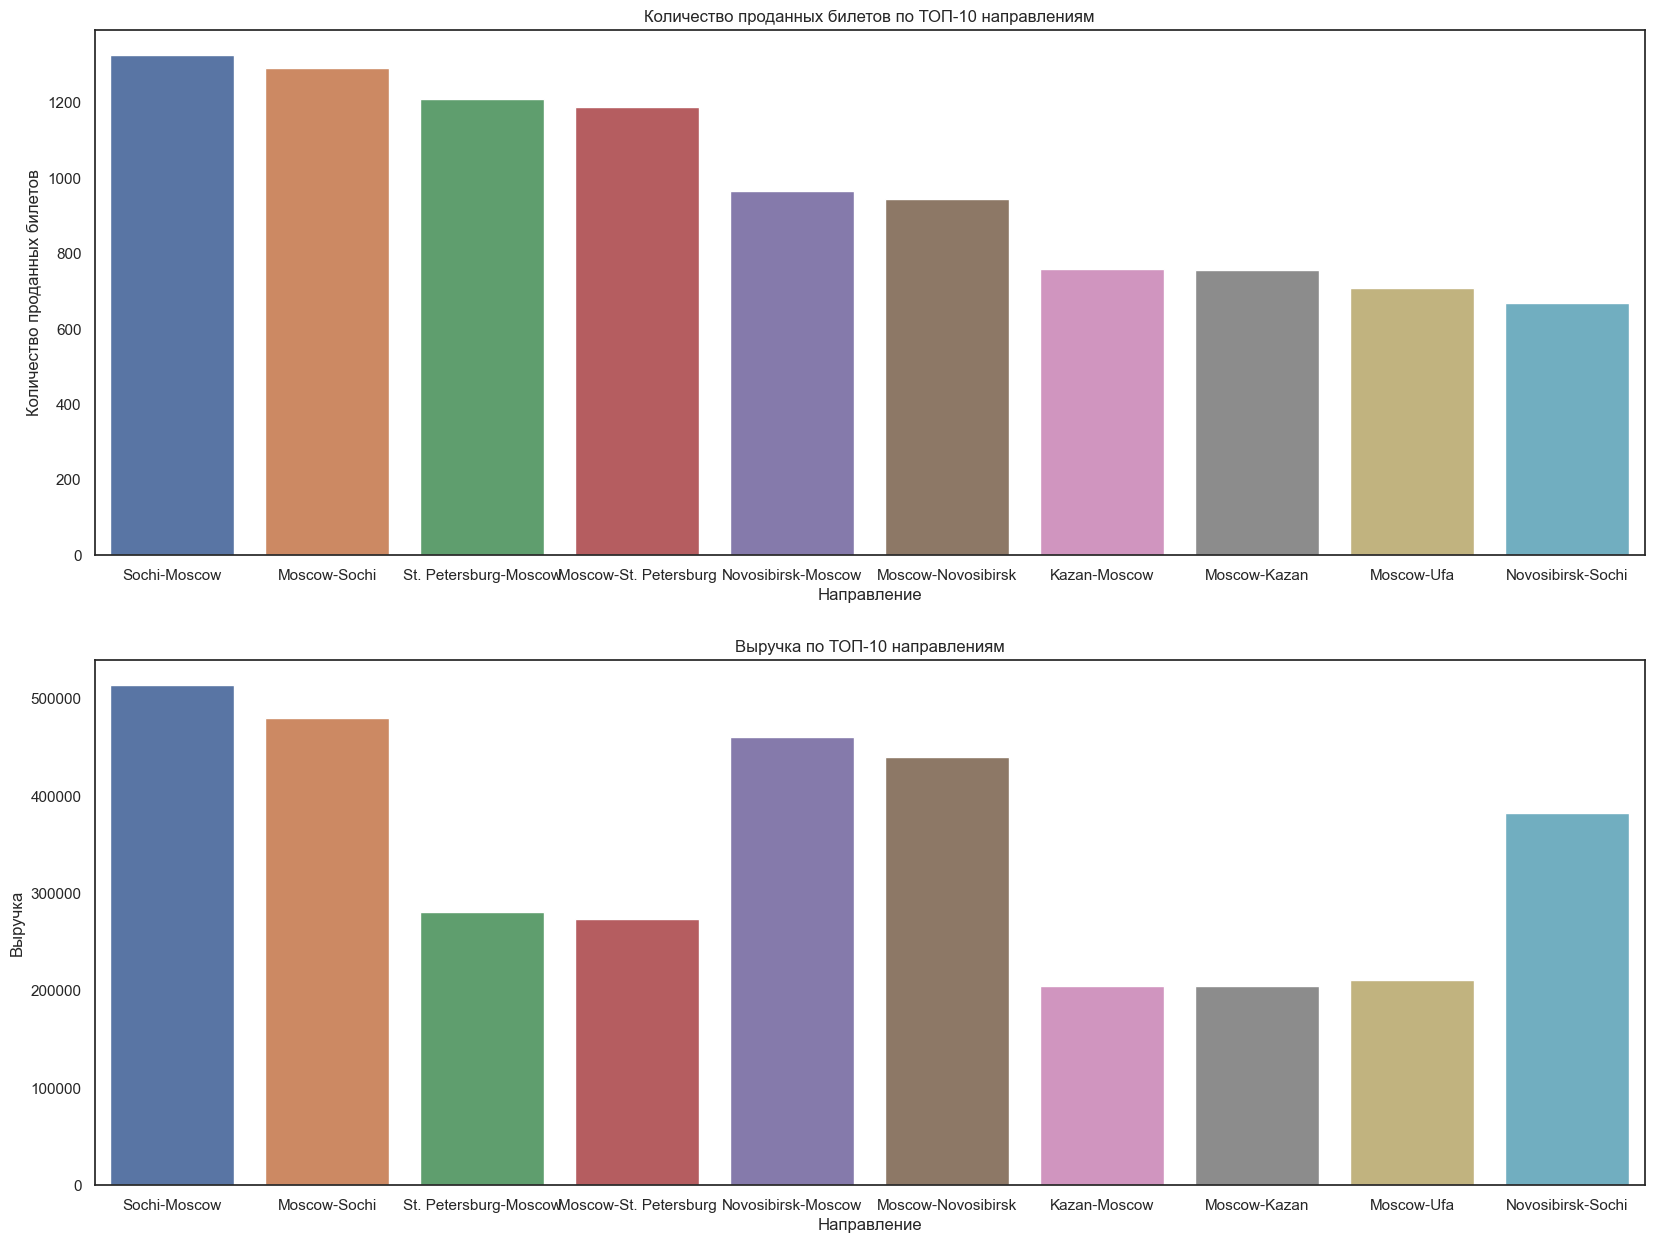

In [1364]:
plt.rcParams['figure.figsize']=20,15
fid,ax = plt.subplots(2,1)

sns.barplot(data=df_VVL_city.reset_index(), y='Count', x='Route_city', ax=ax[0]).set(title='Количество проданных билетов по ТОП-10 направлениям', xlabel='Направление', ylabel='Количество проданных билетов')
sns.barplot(data=df_VVL_city.reset_index(), y='Sum', x='Route_city', ax=ax[1]).set(title='Выручка по ТОП-10 направлениям', xlabel='Направление', ylabel='Выручка')
plt.show()

Исходя из построенных гистограмм можно сделать следующие выводы:
- самое востребованное направление по внутренним воздушным линиям Сочи-Москва и Москва-Сочи, а 10-е место в этом ТОПе занимает Новосибирск-Сочи
- интересным является тот факт, что востребованность направлений чередуется туда-обратно, другими словами, в ТОП-10 входят направления "Москва - Сочи, Сочи - Москва, Москва - Санкт-Петербург, Санкт-Петербург - Москва и так далее"
- в ТОП-10 по направлениям входят города: Москва, Санкт-Петербург, Сочи, Новосибирск, Казань и Уфа, то есть одни из самых больших и популярных городов
- по сумме выручки лидеруют направления Сочи-Москва (и обратно), Новосибирск-Москва (и обратно) и Новосибирск-Сочи; веротянее всего, направление Сочи-Москва лидирует благодаря большому количеству проданных билетов, а билеты из Новосибирска и обратно - из-за высоких цен на билеты, так как Новосибирск расположен дальше всех из представленных в ТОПе городов
- по сумме выручки практически совпадают направления Казань-Москва (и обратно) и Москва-Уфа, что вполне объяснимо расстоянием между Уфой и Казанью, а так же примерно равным спросом на поездки в данные города
- интересен тот факт, что среди всех направлений в Москву и из Москвы, выручка от проданных билетов выше именно по направлению в Москву, а не обратно

Теперь проанализируем график по международным воздушным линиям

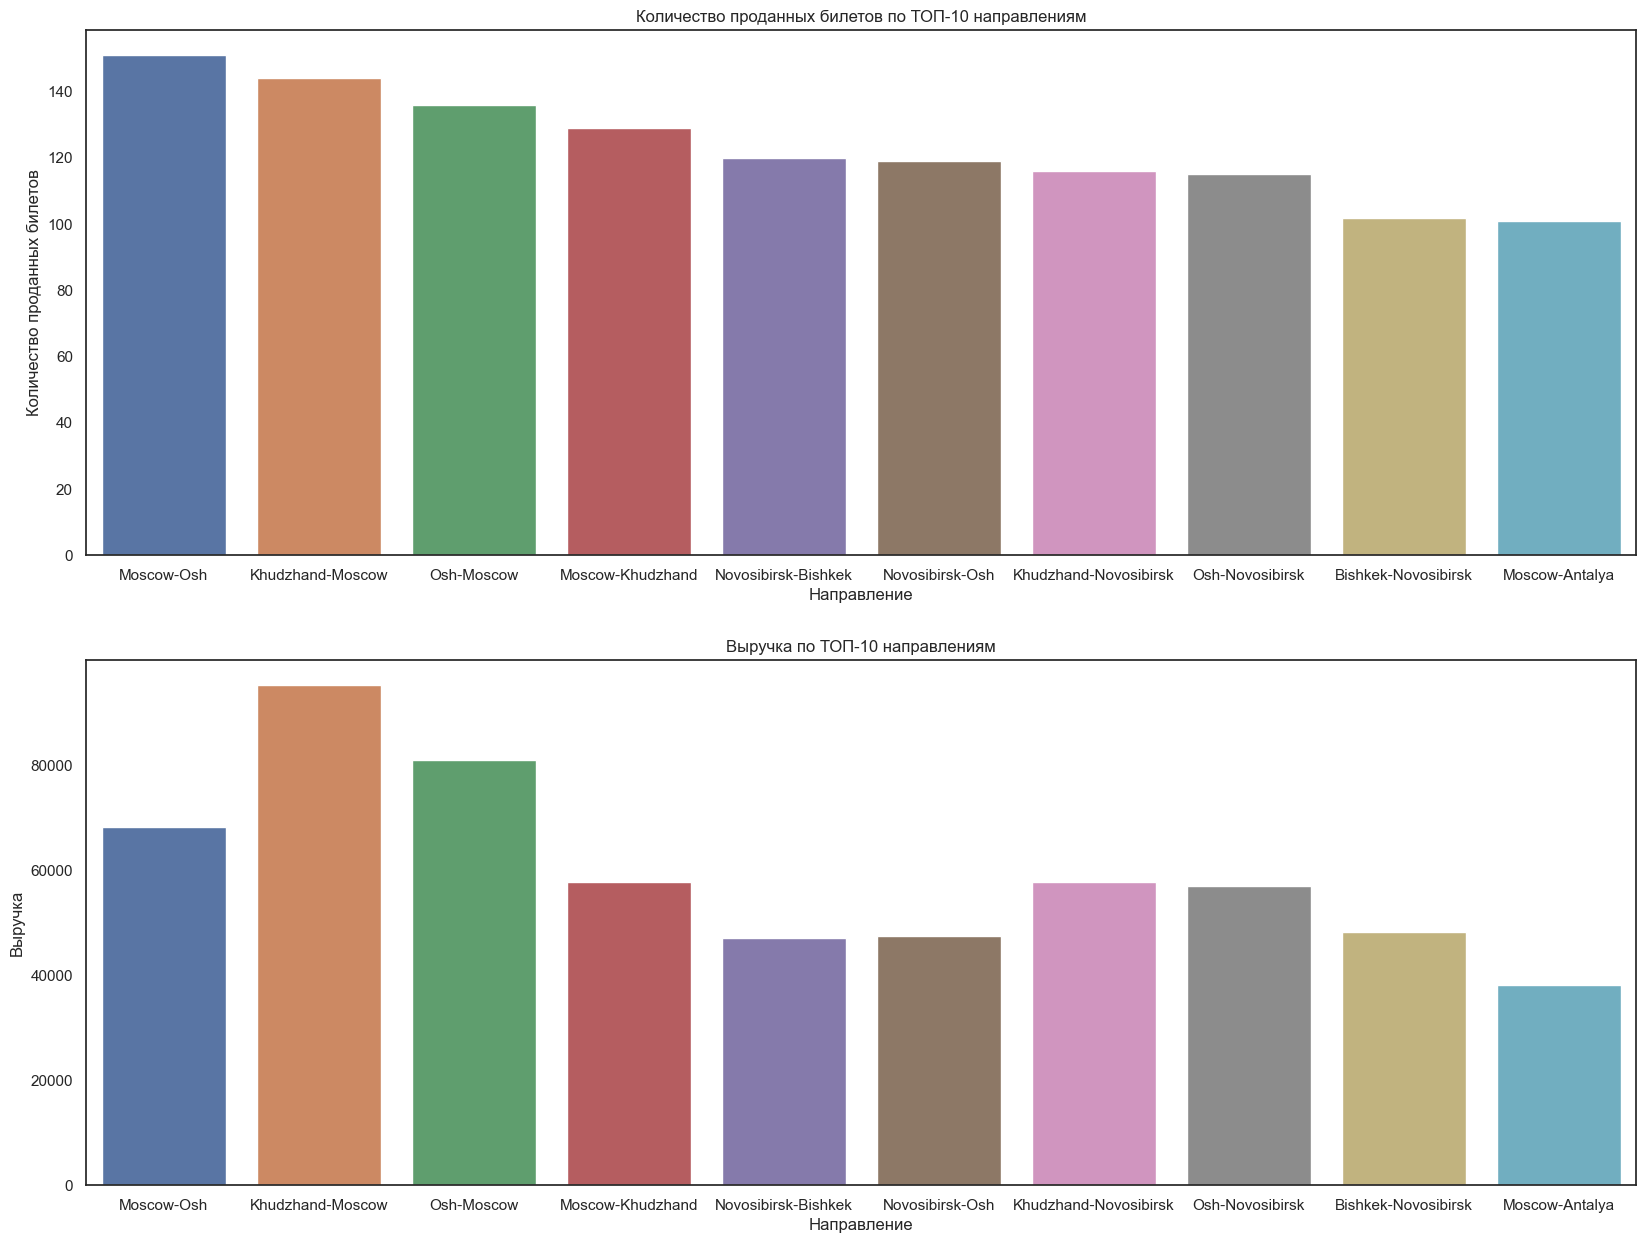

In [1366]:
plt.rcParams['figure.figsize']=20,15
fid,ax = plt.subplots(2,1)

sns.barplot(data=df_MVL_city.reset_index(), y='Count', x='Route_city', ax=ax[0]).set(title='Количество проданных билетов по ТОП-10 направлениям', xlabel='Направление', ylabel='Количество проданных билетов')
sns.barplot(data=df_MVL_city.reset_index(), y='Sum', x='Route_city', ax=ax[1]).set(title='Выручка по ТОП-10 направлениям', xlabel='Направление', ylabel='Выручка')
plt.show()

Выводы:
- самое большое количество проданных билетов наблюдается по направлению Москва-Ош
- первая четверка городов в ТОПе представляет прямые и обратные направления из Москвы до Оша и Худжанда
- также остаются востребованными направления из Новосибирска в Бишкек и Ош и обратно, а также Худжанд - Новосибирск
- 10-е место в ТОПе занимает направление Москва-Анталья
- по выручке наибольшее значение показывает направление Худжанд-Москва и Ош-Москва, а в обратные направления уже значительно ниже
- аналогичная ситуация наблюдается на рейсах Новосибирск-Ош, в этом направлении цена ниже, чем в обратном (Ош-Новосибирск)
- наименьшее значение выручки в ТОПе показывает направление Москва-Анталья

### 3.6

Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

In [1536]:
df_3 = df_1
df_3

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,season,month,days,group
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,No,ONLINE,Winter,12,35,4
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,No,OFFLINE,Winter,12,3,2
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,Autumn,11,37,4
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,No,ONLINE,Winter,12,28,3
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,Winter,12,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,No,ONLINE,Summer,6,11,3
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,No,OFFLINE,Summer,6,14,3
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,Summer,6,3,2
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,No,OFFLINE,Summer,6,2,1


In [1541]:
df_corr = df_3[['route_flight_type', 'pax_type', 'sale_type', 'ffp_flag', 'season', 'revenue_amount']]
df_corr

,route_flight_type,pax_type,sale_type,ffp_flag,season,revenue_amount
0,ВВЛ,AD,ONLINE,No,Winter,200
1,ВВЛ,AD,OFFLINE,No,Winter,610
2,ВВЛ,AD,ONLINE,FFP,Autumn,390
3,ВВЛ,AD,ONLINE,No,Winter,190
4,ВВЛ,AD,OFFLINE,FFP,Winter,190
...,...,...,...,...,...,...
49995,ВВЛ,CHD,ONLINE,No,Summer,480
49996,ВВЛ,AD,OFFLINE,No,Summer,270
49997,ВВЛ,AD,ONLINE,FFP,Summer,230
49998,ВВЛ,AD,OFFLINE,No,Summer,270


In [1545]:
# Кодируем категориальные признаки в числовые
df_corr['route_flight_type'] = pd.Categorical(df_3['route_flight_type']).codes
df_corr['pax_type'] = pd.Categorical(df_3['pax_type']).codes
df_corr['ffp_flag'] = pd.Categorical(df_3['ffp_flag']).codes
df_corr['sale_type'] = pd.Categorical(df_3['sale_type']).codes
dict_season = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
df_corr['season'] = df_3['season'].map(dict_season)
df_corr

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\2026811068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['route_flight_type'] = pd.Categorical(df_3['route_flight_type']).codes
C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\2026811068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['pax_type'] = pd.Categorical(df_3['pax_type']).codes
C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_10184\2026811068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,route_flight_type,pax_type,sale_type,ffp_flag,season,revenue_amount
0,0,0,1,1,1,200
1,0,0,0,1,1,610
2,0,0,1,0,4,390
3,0,0,1,1,1,190
4,0,0,0,0,1,190
...,...,...,...,...,...,...
49995,0,1,1,1,3,480
49996,0,0,0,1,3,270
49997,0,0,1,0,3,230
49998,0,0,0,1,3,270


route_flight_type: ВВЛ "0" и МВЛ "1"

pax_type: AD "0" и CHD "1" и INF "2"

sale_type: Онлайн "1" и Оффлайн "0"

ffp_flag: No "1" и FFP "0"

season: 1-Winter, 2-Spring, 3-Summer, 4-Autumn

In [1546]:
corr_matrix = df_corr.corr()
corr_matrix

,route_flight_type,pax_type,sale_type,ffp_flag,season,revenue_amount
route_flight_type,1.000000,0.054019,-0.105372,0.160406,0.008627,0.100523
pax_type,0.054019,1.000000,0.049910,0.160725,-0.000849,-0.082869
sale_type,-0.105372,0.049910,1.000000,-0.321423,-0.011424,-0.166082
ffp_flag,0.160406,0.160725,-0.321423,1.000000,0.023708,0.052252
season,0.008627,-0.000849,-0.011424,0.023708,1.000000,0.016643
revenue_amount,0.100523,-0.082869,-0.166082,0.052252,0.016643,1.000000


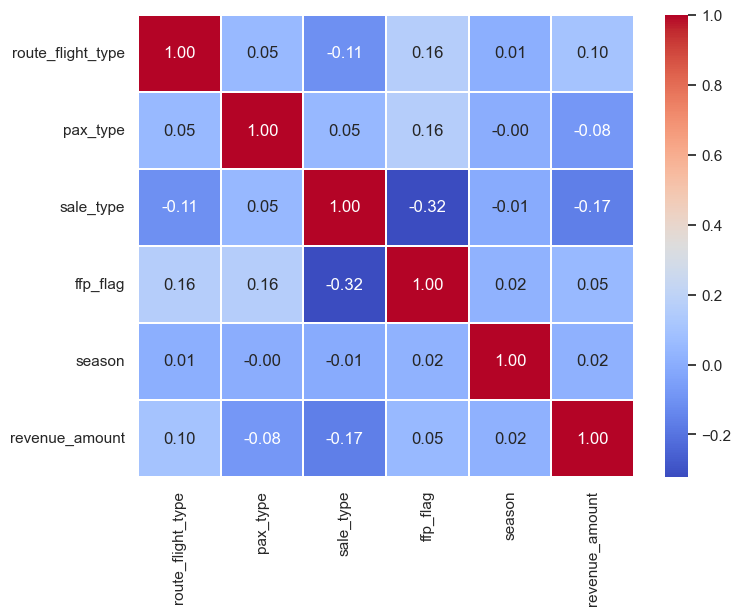

In [1547]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.3)
plt.show()

На данном этапе была проанализирована зависимость выручки от других факторов, так как тип перелета, тип пассажиров, способ покупки, наличие программы лояльности и сезон (выступает как фактор времени, так как рассматривать выручку по сезонам логичнее, чем по отдельным дням, а по месяцам анализ уже проводился выше). По выручке слабая связь (но наибольшая из представленных на тепловой карте) наблюдается между типом продажи (онлайн или оффлайн) и выручкой. Тесной связи между выручкой и типом перелета, типом пассажира, наличием программы лояльности и сезоном не наблюдается. Однако по тепловой карте можно также увидеть, что связь между наличием программы лояльности и типом продажи умеренная (по шкале Чеддока), в какой-то степени это можно объяснить тем, что людям которые покупают билеты онлайн намного проще найти информацию о программе лояльности и зарегистрироваться в ней, чем людям, которые привыкли покупать билеты оффлайн в специальных местах продаж, не задумываясь о своей выгоде. И наоборот, люди, пользующиеся программой лояльности, знают о возможности и безопасности покупать билеты онлайн. Слабая связь между типом перелета и наличием программы лояльности можно объяснить наличием определенных условий при данном типе перелета. Также относительно значительный показатель наблюдается между типом пассажира и наличием программы лояльности, что может быть связано с невомозможностью регистрации детей в данной программе.

Все задания выполнены. Сначала была проведена предобработка данных, чтобы в дальнешем с данными было удобно работать. Затем был проведен исследовательский анализ данных, благодаря которому были изучены продажи билетов авиакомпании.